## Data Preprocessing: Feasture Scaling

1. Rescaling Data
2. Normalizing Data
3. Standardizing Data

[More Information](https://machinelearningmastery.com/prepare-data-machine-learning-python-scikit-learn/)


[Data Description](https://www.kaggle.com/uciml/pima-indians-diabetes-database)

In [1]:
# Rescale data (between 0 and 1)
import pandas
import scipy
import numpy
from sklearn.preprocessing import MinMaxScaler

dataframe = pandas.read_csv("./files/prims.csv")
array = dataframe.values

X = array[:,:8]
scaler = MinMaxScaler(feature_range=(0, 1))
rescaledX=scaler.fit_transform(X)

numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])


[[0.353 0.744 0.59  0.354 0.    0.501 0.234 0.483]
 [0.059 0.427 0.541 0.293 0.    0.396 0.117 0.167]
 [0.471 0.92  0.525 0.    0.    0.347 0.254 0.183]
 [0.059 0.447 0.541 0.232 0.111 0.419 0.038 0.   ]
 [0.    0.688 0.328 0.354 0.199 0.642 0.944 0.2  ]]


In [2]:
# Normalize data (length of 1)
#Normalizing in scikit-learn refers to rescaling each observation (row) to have a length of 1 (called a unit norm in linear algebra).

from sklearn.preprocessing import Normalizer
import pandas
import numpy

dataframe = pandas.read_csv("./files/prims.csv")
array = dataframe.values

X = array[:,0:8]
scaler = Normalizer().fit(X)
normalizedX = scaler.transform(X)

numpy.set_printoptions(precision=3)
print(normalizedX[0:5,:])

 

[[0.034 0.828 0.403 0.196 0.    0.188 0.004 0.28 ]
 [0.008 0.716 0.556 0.244 0.    0.224 0.003 0.261]
 [0.04  0.924 0.323 0.    0.    0.118 0.003 0.162]
 [0.007 0.588 0.436 0.152 0.622 0.186 0.001 0.139]
 [0.    0.596 0.174 0.152 0.731 0.188 0.01  0.144]]


In [3]:
# Standardize data (0 mean, 1 stdev)
# Standardization is a useful technique to transform attributes with a Gaussian distribution and differing means and standard deviations to a standard Gaussian distribution with a mean of 0 and a standard deviation of 1.

"""
scaled_train =  (train - train_mean) / train_std_deviation
scaled_test = (test - train_mean) / train_std_deviation
"""


import pandas
import numpy
from sklearn.preprocessing import StandardScaler 

dataframe = pandas.read_csv("./files/prims.csv")
array = dataframe.values

 
X = array[:700,:8]
 
scaler = StandardScaler().fit(X)
rescaledX = scaler.transform(X)

numpy.set_printoptions(precision=3)
print(rescaledX[0:5,:])

std = numpy.std(rescaledX,axis=0)
print(std)
print("\n")


test=scaler.transform(array[700:,:8])

print(test[0:5,:])

std = numpy.std(test,axis=0)
print(std)

[[ 0.646  0.853  0.16   0.912 -0.692  0.215  0.448  1.433]
 [-0.841 -1.104 -0.147  0.538 -0.692 -0.666 -0.371 -0.18 ]
 [ 1.241  1.941 -0.25  -1.272 -0.692 -1.081  0.581 -0.095]
 [-0.841 -0.98  -0.147  0.163  0.122 -0.477 -0.917 -1.03 ]
 [-1.138  0.511 -1.479  0.912  0.763  1.411  5.375 -0.011]]
[1. 1. 1. 1. 1. 1. 1. 1.]


[[-0.543  0.045  0.365  0.413  1.04   0.505  0.021 -0.605]
 [ 0.646  0.139  0.467  0.663 -0.692 -0.54   0.264  1.348]
 [-0.841  1.475  0.979  0.538 -0.692  0.391  1.273  1.603]
 [-0.543  0.263 -3.527 -1.272 -0.692  0.832 -0.51   0.669]
 [ 0.051 -0.328  0.365 -0.024  0.174 -0.439 -1.062 -0.52 ]]
[1.016 0.907 0.879 0.937 0.966 0.892 0.764 0.971]


# Neural Network 

## Feedforward

[Code](https://enlight.nyc/projects/neural-network/)

In [4]:
import numpy as np

# X = (hours sleeping, hours studying), y = score on test
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)

# scale units
X = X/np.amax(X, axis=0) # maximum of X array
y = y/100 # max test score is 100

class Neural_Network(object):
  def __init__(self):
    #parameters
    self.inputSize = 2
    self.outputSize = 1
    self.hiddenSize = 3

    #weights
    self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (3x2) weight matrix from input to hidden layer
    self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix from hidden to output layer

  def forward(self, X):
    #forward propagation through our network
    self.z = np.dot(X, self.W1) # dot product of X (input) and first set of 3x2 weights
    self.z2 = self.sigmoid(self.z) # activation function
    self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer (z2) and second set of 3x1 weights
    o = self.sigmoid(self.z3) # final activation function
    return o

  def sigmoid(self, s):
    # activation function
    return 1/(1+np.exp(-s))

NN = Neural_Network()

#defining our output
o = NN.forward(X)

print("Predicted Output: \n" + str(o))
print ("Actual Output: \n" + str(y))

Predicted Output: 
[[0.528]
 [0.499]
 [0.609]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]


# Neural Network 

## Feedforward and Backpropagation



In [5]:
import numpy as np

# X = (hours studying, hours sleeping), y = score on test, xPredicted = 4 hours studying & 8 hours sleeping (input data for prediction)
X = np.array(([2, 9], [1, 5], [3, 6]), dtype=float)
y = np.array(([92], [86], [89]), dtype=float)
xPredicted = np.array(([4,8]), dtype=float)

# scale units
X = X/np.amax(X, axis=0) # maximum of X array
xPredicted = xPredicted/np.amax(xPredicted, axis=0) # maximum of xPredicted (our input data for the prediction)
y = y/100 # max test score is 100

class Neural_Network(object):
  def __init__(self):
  #parameters
    self.inputSize = 2
    self.outputSize = 1
    self.hiddenSize = 3

  #weights
    self.W1 = np.random.randn(self.inputSize, self.hiddenSize) # (3x2) weight matrix from input to hidden layer
    self.W2 = np.random.randn(self.hiddenSize, self.outputSize) # (3x1) weight matrix from hidden to output layer

  def forward(self, X):
    #forward propagation through our network
    self.z = np.dot(X, self.W1) # dot product of X (input) and first set of 3x2 weights
    self.z2 = self.sigmoid(self.z) # activation function
    self.z3 = np.dot(self.z2, self.W2) # dot product of hidden layer (z2) and second set of 3x1 weights
    o = self.sigmoid(self.z3) # final activation function
    return o

  def sigmoid(self, s):
    # activation function
    return 1/(1+np.exp(-s))

  def sigmoidPrime(self, s):
    #derivative of sigmoid
    return s * (1 - s)

  def backward(self, X, y, o):
    # backward propagate through the network
    self.o_error = y - o # error in output
    self.o_delta = self.o_error*self.sigmoidPrime(o) # applying derivative of sigmoid to error

    self.z2_error = self.o_delta.dot(self.W2.T) # z2 error: how much our hidden layer weights contributed to output error
    self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2) # applying derivative of sigmoid to z2 error

    self.W1 += X.T.dot(self.z2_delta) # adjusting first set (input --> hidden) weights
    self.W2 += self.z2.T.dot(self.o_delta) # adjusting second set (hidden --> output) weights

  def train(self, X, y):
    o = self.forward(X)
    self.backward(X, y, o)

  def saveWeights(self):
    np.savetxt("w1.txt", self.W1, fmt="%s")
    np.savetxt("w2.txt", self.W2, fmt="%s")

  def predict(self):
    print ("Predicted data based on trained weights: ")
    print ("Input (scaled): \n" + str(xPredicted))
    print ("Output: \n" + str(self.forward(xPredicted)));

NN = Neural_Network()
for i in range(0,10): # trains the NN 1,000 times
  print("# " + str(i) + "\n")
  print("Input (scaled): \n" + str(X))
  print("Actual Output: \n" + str(y))
  print("Predicted Output: \n" + str(NN.forward(X)))
  print("Loss: \n" + str(np.mean(np.square(y - NN.forward(X))))) # mean sum squared loss
  print ("\n")
  NN.train(X, y)

NN.saveWeights()
NN.predict()

# 0

Input (scaled): 
[[0.667 1.   ]
 [0.333 0.556]
 [1.    0.667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.692]
 [0.707]
 [0.677]]
Loss: 
0.04022376901072677


# 1

Input (scaled): 
[[0.667 1.   ]
 [0.333 0.556]
 [1.    0.667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.705]
 [0.719]
 [0.69 ]]
Loss: 
0.03541797204566044


# 2

Input (scaled): 
[[0.667 1.   ]
 [0.333 0.556]
 [1.    0.667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.717]
 [0.73 ]
 [0.702]]
Loss: 
0.031171036455726164


# 3

Input (scaled): 
[[0.667 1.   ]
 [0.333 0.556]
 [1.    0.667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.728]
 [0.741]
 [0.713]]
Loss: 
0.027436376319368575


# 4

Input (scaled): 
[[0.667 1.   ]
 [0.333 0.556]
 [1.    0.667]]
Actual Output: 
[[0.92]
 [0.86]
 [0.89]]
Predicted Output: 
[[0.739]
 [0.75 ]
 [0.723]]
Loss: 
0.024165087469337806


# 5

Input (scaled): 
[[0.667 1.   ]
 [0.333 0.556]
 [1.    0.667]]
Actu

In [6]:
from sklearn.neural_network import MLPClassifier
help(MLPClassifier)

Help on class MLPClassifier in module sklearn.neural_network.multilayer_perceptron:

class MLPClassifier(BaseMultilayerPerceptron, sklearn.base.ClassifierMixin)
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity', 'logistic', 'tanh', 'relu'}, default 'relu'
 |      Activation function for the hidden layer.
 |  
 |      - 'identity', no-op activation, useful to implement linear bottleneck,
 |        returns f(x) = x
 |  
 |      - 'logistic', the logistic sigmoid function,
 |        returns f(x) = 1 / (1 + exp(-x)).
 |  
 |      - 'tanh', the hyperbolic tan function,
 |        returns f(x) = tanh(x).
 |  
 |      - 'relu', the rectified linear u

In [7]:
from sklearn.neural_network import MLPClassifier


dataframe = pandas.read_csv("./files/prims.csv")
array = dataframe.values
X=array[:,:8]
y = array[:,8]
scaler = MinMaxScaler(feature_range=(0, 1))
X=scaler.fit_transform(X)

# rescale the data, use the traditional train/test split
X_train, X_test = X[:700], X[700:]
y_train, y_test = y[:700], y[700:]

mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10000, alpha=1e-4,
                    solver='adam', verbose=10, tol=1e-4, random_state=1)
#mlp = MLPClassifier(hidden_layer_sizes=(50,), max_iter=10, alpha=1e-4,
#                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
#                    learning_rate_init=.1)

mlp.fit(X_train, y_train)
print("Training set score: %f" % mlp.score(X_train, y_train))
print("Test set score: %f" % mlp.score(X_test, y_test))



Iteration 1, loss = 0.69225859
Iteration 2, loss = 0.68286383
Iteration 3, loss = 0.67564925
Iteration 4, loss = 0.66941684
Iteration 5, loss = 0.66401914
Iteration 6, loss = 0.66004404
Iteration 7, loss = 0.65619876
Iteration 8, loss = 0.65268342
Iteration 9, loss = 0.64974644
Iteration 10, loss = 0.64698598
Iteration 11, loss = 0.64431285
Iteration 12, loss = 0.64173960
Iteration 13, loss = 0.63922889
Iteration 14, loss = 0.63679691
Iteration 15, loss = 0.63425251
Iteration 16, loss = 0.63186714
Iteration 17, loss = 0.62935345
Iteration 18, loss = 0.62690308
Iteration 19, loss = 0.62411275
Iteration 20, loss = 0.62153795
Iteration 21, loss = 0.61873835
Iteration 22, loss = 0.61591680
Iteration 23, loss = 0.61303832
Iteration 24, loss = 0.61015721
Iteration 25, loss = 0.60733694
Iteration 26, loss = 0.60470102
Iteration 27, loss = 0.60239766
Iteration 28, loss = 0.59998877
Iteration 29, loss = 0.59782174
Iteration 30, loss = 0.59573785
Iteration 31, loss = 0.59376595
Iteration 32, los

#### In the above code, play on the hyperparameters 

In [8]:
from sklearn.neural_network import MLPRegressor
help(MLPRegressor)

Help on class MLPRegressor in module sklearn.neural_network.multilayer_perceptron:

class MLPRegressor(BaseMultilayerPerceptron, sklearn.base.RegressorMixin)
 |  Multi-layer Perceptron regressor.
 |  
 |  This model optimizes the squared-loss using LBFGS or stochastic gradient
 |  descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default (100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity', 'logistic', 'tanh', 'relu'}, default 'relu'
 |      Activation function for the hidden layer.
 |  
 |      - 'identity', no-op activation, useful to implement linear bottleneck,
 |        returns f(x) = x
 |  
 |      - 'logistic', the logistic sigmoid function,
 |        returns f(x) = 1 / (1 + exp(-x)).
 |  
 |      - 'tanh', the hyperbolic tan function,
 |        returns f(x) = tanh(x).
 |  
 |      - 'relu', the rectified linear unit funct

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor

#http://www.machinelearningtutorial.net/2017/01/28/python-scikit-simple-function-approximation/

np.random.seed(3)
n = 20
x = np.random.uniform(-15, 15, size = n)
y = x**2 + 2*np.random.randn(n, )
X = np.reshape(x ,[n, 1]) 
y = np.reshape(y ,[n ,])

clf = MLPRegressor(alpha=0.001, hidden_layer_sizes = (10,), max_iter = 50000, 
                 activation = 'logistic', verbose = 'True', learning_rate = 'adaptive')

"""
clf = MLPRegressor(alpha=0.1, hidden_layer_sizes = (10,), max_iter = 50000, 
                 activation = 'logistic', verbose = 'True', learning_rate = 'adaptive')
"""
a = clf.fit(X, y)

Iteration 1, loss = 4576.85361484
Iteration 2, loss = 4576.29953733
Iteration 3, loss = 4575.74594857
Iteration 4, loss = 4575.19286444
Iteration 5, loss = 4574.64030059
Iteration 6, loss = 4574.08827245
Iteration 7, loss = 4573.53679519
Iteration 8, loss = 4572.98588368
Iteration 9, loss = 4572.43555249
Iteration 10, loss = 4571.88581588
Iteration 11, loss = 4571.33668775
Iteration 12, loss = 4570.78818165
Iteration 13, loss = 4570.24031074
Iteration 14, loss = 4569.69308778
Iteration 15, loss = 4569.14652512
Iteration 16, loss = 4568.60063466
Iteration 17, loss = 4568.05542787
Iteration 18, loss = 4567.51091573
Iteration 19, loss = 4566.96710874
Iteration 20, loss = 4566.42401690
Iteration 21, loss = 4565.88164967
Iteration 22, loss = 4565.34001600
Iteration 23, loss = 4564.79912426
Iteration 24, loss = 4564.25898227
Iteration 25, loss = 4563.71959730
Iteration 26, loss = 4563.18097603
Iteration 27, loss = 4562.64312462
Iteration 28, loss = 4562.10604868
Iteration 29, loss = 4561.569

Iteration 232, loss = 4465.04414200
Iteration 233, loss = 4464.55362464
Iteration 234, loss = 4464.06276127
Iteration 235, loss = 4463.57158834
Iteration 236, loss = 4463.08014105
Iteration 237, loss = 4462.58845326
Iteration 238, loss = 4462.09655731
Iteration 239, loss = 4461.60448390
Iteration 240, loss = 4461.11226203
Iteration 241, loss = 4460.61991884
Iteration 242, loss = 4460.12747962
Iteration 243, loss = 4459.63496766
Iteration 244, loss = 4459.14240430
Iteration 245, loss = 4458.64980880
Iteration 246, loss = 4458.15719842
Iteration 247, loss = 4457.66458834
Iteration 248, loss = 4457.17199172
Iteration 249, loss = 4456.67941970
Iteration 250, loss = 4456.18688144
Iteration 251, loss = 4455.69438414
Iteration 252, loss = 4455.20193310
Iteration 253, loss = 4454.70953182
Iteration 254, loss = 4454.21718200
Iteration 255, loss = 4453.72488363
Iteration 256, loss = 4453.23263509
Iteration 257, loss = 4452.74043322
Iteration 258, loss = 4452.24827338
Iteration 259, loss = 4451.7

Iteration 478, loss = 4334.34779911
Iteration 479, loss = 4333.75864126
Iteration 480, loss = 4333.16936751
Iteration 481, loss = 4332.57999617
Iteration 482, loss = 4331.99054505
Iteration 483, loss = 4331.40103142
Iteration 484, loss = 4330.81147196
Iteration 485, loss = 4330.22188274
Iteration 486, loss = 4329.63227922
Iteration 487, loss = 4329.04267624
Iteration 488, loss = 4328.45308798
Iteration 489, loss = 4327.86352798
Iteration 490, loss = 4327.27400915
Iteration 491, loss = 4326.68454373
Iteration 492, loss = 4326.09514335
Iteration 493, loss = 4325.50581903
Iteration 494, loss = 4324.91658114
Iteration 495, loss = 4324.32743951
Iteration 496, loss = 4323.73840334
Iteration 497, loss = 4323.14948132
Iteration 498, loss = 4322.56068158
Iteration 499, loss = 4321.97201173
Iteration 500, loss = 4321.38347889
Iteration 501, loss = 4320.79508971
Iteration 502, loss = 4320.20685039
Iteration 503, loss = 4319.61876667
Iteration 504, loss = 4319.03084389
Iteration 505, loss = 4318.4

Iteration 716, loss = 4194.11901845
Iteration 717, loss = 4193.47824454
Iteration 718, loss = 4192.83587959
Iteration 719, loss = 4192.19188697
Iteration 720, loss = 4191.54622981
Iteration 721, loss = 4190.89887141
Iteration 722, loss = 4190.24977585
Iteration 723, loss = 4189.59890856
Iteration 724, loss = 4188.94623695
Iteration 725, loss = 4188.29173103
Iteration 726, loss = 4187.63536401
Iteration 727, loss = 4186.97711289
Iteration 728, loss = 4186.31695894
Iteration 729, loss = 4185.65488822
Iteration 730, loss = 4184.99089196
Iteration 731, loss = 4184.32496695
Iteration 732, loss = 4183.65711580
Iteration 733, loss = 4182.98734720
Iteration 734, loss = 4182.31567614
Iteration 735, loss = 4181.64212403
Iteration 736, loss = 4180.96671880
Iteration 737, loss = 4180.28949502
Iteration 738, loss = 4179.61049385
Iteration 739, loss = 4178.92976309
Iteration 740, loss = 4178.24735709
Iteration 741, loss = 4177.56333668
Iteration 742, loss = 4176.87776900
Iteration 743, loss = 4176.1

Iteration 964, loss = 4031.08143241
Iteration 965, loss = 4030.42435992
Iteration 966, loss = 4029.76711821
Iteration 967, loss = 4029.10970878
Iteration 968, loss = 4028.45213308
Iteration 969, loss = 4027.79439254
Iteration 970, loss = 4027.13648850
Iteration 971, loss = 4026.47842229
Iteration 972, loss = 4025.82019517
Iteration 973, loss = 4025.16180839
Iteration 974, loss = 4024.50326315
Iteration 975, loss = 4023.84456065
Iteration 976, loss = 4023.18570204
Iteration 977, loss = 4022.52668850
Iteration 978, loss = 4021.86752119
Iteration 979, loss = 4021.20820130
Iteration 980, loss = 4020.54873005
Iteration 981, loss = 4019.88910869
Iteration 982, loss = 4019.22933854
Iteration 983, loss = 4018.56942098
Iteration 984, loss = 4017.90935746
Iteration 985, loss = 4017.24914954
Iteration 986, loss = 4016.58879888
Iteration 987, loss = 4015.92830728
Iteration 988, loss = 4015.26767664
Iteration 989, loss = 4014.60690904
Iteration 990, loss = 4013.94600669
Iteration 991, loss = 4013.2

Iteration 1369, loss = 3770.39283038
Iteration 1370, loss = 3769.78271076
Iteration 1371, loss = 3769.17279914
Iteration 1372, loss = 3768.56309561
Iteration 1373, loss = 3767.95360029
Iteration 1374, loss = 3767.34431327
Iteration 1375, loss = 3766.73523465
Iteration 1376, loss = 3766.12636452
Iteration 1377, loss = 3765.51770299
Iteration 1378, loss = 3764.90925015
Iteration 1379, loss = 3764.30100609
Iteration 1380, loss = 3763.69297091
Iteration 1381, loss = 3763.08514470
Iteration 1382, loss = 3762.47752754
Iteration 1383, loss = 3761.87011953
Iteration 1384, loss = 3761.26292076
Iteration 1385, loss = 3760.65593130
Iteration 1386, loss = 3760.04915126
Iteration 1387, loss = 3759.44258071
Iteration 1388, loss = 3758.83621974
Iteration 1389, loss = 3758.23006843
Iteration 1390, loss = 3757.62412686
Iteration 1391, loss = 3757.01839511
Iteration 1392, loss = 3756.41287327
Iteration 1393, loss = 3755.80756140
Iteration 1394, loss = 3755.20245959
Iteration 1395, loss = 3754.59756792
I

Iteration 1629, loss = 3618.90009287
Iteration 1630, loss = 3618.34517811
Iteration 1631, loss = 3617.79047421
Iteration 1632, loss = 3617.23598111
Iteration 1633, loss = 3616.68169878
Iteration 1634, loss = 3616.12762718
Iteration 1635, loss = 3615.57376627
Iteration 1636, loss = 3615.02011601
Iteration 1637, loss = 3614.46667635
Iteration 1638, loss = 3613.91344725
Iteration 1639, loss = 3613.36042868
Iteration 1640, loss = 3612.80762059
Iteration 1641, loss = 3612.25502294
Iteration 1642, loss = 3611.70263568
Iteration 1643, loss = 3611.15045878
Iteration 1644, loss = 3610.59849219
Iteration 1645, loss = 3610.04673587
Iteration 1646, loss = 3609.49518978
Iteration 1647, loss = 3608.94385387
Iteration 1648, loss = 3608.39272810
Iteration 1649, loss = 3607.84181242
Iteration 1650, loss = 3607.29110680
Iteration 1651, loss = 3606.74061119
Iteration 1652, loss = 3606.19032554
Iteration 1653, loss = 3605.64024981
Iteration 1654, loss = 3605.09038396
Iteration 1655, loss = 3604.54072794
I

Iteration 1956, loss = 3448.38126544
Iteration 1957, loss = 3447.89238244
Iteration 1958, loss = 3447.40369094
Iteration 1959, loss = 3446.91519087
Iteration 1960, loss = 3446.42688218
Iteration 1961, loss = 3445.93876479
Iteration 1962, loss = 3445.45083863
Iteration 1963, loss = 3444.96310364
Iteration 1964, loss = 3444.47555974
Iteration 1965, loss = 3443.98820687
Iteration 1966, loss = 3443.50104497
Iteration 1967, loss = 3443.01407395
Iteration 1968, loss = 3442.52729376
Iteration 1969, loss = 3442.04070432
Iteration 1970, loss = 3441.55430557
Iteration 1971, loss = 3441.06809744
Iteration 1972, loss = 3440.58207985
Iteration 1973, loss = 3440.09625275
Iteration 1974, loss = 3439.61061607
Iteration 1975, loss = 3439.12516973
Iteration 1976, loss = 3438.63991366
Iteration 1977, loss = 3438.15484780
Iteration 1978, loss = 3437.66997209
Iteration 1979, loss = 3437.18528644
Iteration 1980, loss = 3436.70079080
Iteration 1981, loss = 3436.21648509
Iteration 1982, loss = 3435.73236924
I

Iteration 2400, loss = 3249.16649270
Iteration 2401, loss = 3248.75600643
Iteration 2402, loss = 3248.34568231
Iteration 2403, loss = 3247.93552028
Iteration 2404, loss = 3247.52552030
Iteration 2405, loss = 3247.11568228
Iteration 2406, loss = 3246.70600618
Iteration 2407, loss = 3246.29649193
Iteration 2408, loss = 3245.88713948
Iteration 2409, loss = 3245.47794875
Iteration 2410, loss = 3245.06891970
Iteration 2411, loss = 3244.66005225
Iteration 2412, loss = 3244.25134636
Iteration 2413, loss = 3243.84280195
Iteration 2414, loss = 3243.43441898
Iteration 2415, loss = 3243.02619737
Iteration 2416, loss = 3242.61813706
Iteration 2417, loss = 3242.21023801
Iteration 2418, loss = 3241.80250014
Iteration 2419, loss = 3241.39492340
Iteration 2420, loss = 3240.98750772
Iteration 2421, loss = 3240.58025304
Iteration 2422, loss = 3240.17315932
Iteration 2423, loss = 3239.76622647
Iteration 2424, loss = 3239.35945445
Iteration 2425, loss = 3238.95284320
Iteration 2426, loss = 3238.54639265
I

Iteration 2642, loss = 3154.41977530
Iteration 2643, loss = 3154.04682847
Iteration 2644, loss = 3153.67402997
Iteration 2645, loss = 3153.30137976
Iteration 2646, loss = 3152.92887778
Iteration 2647, loss = 3152.55652398
Iteration 2648, loss = 3152.18431831
Iteration 2649, loss = 3151.81226070
Iteration 2650, loss = 3151.44035112
Iteration 2651, loss = 3151.06858950
Iteration 2652, loss = 3150.69697580
Iteration 2653, loss = 3150.32550995
Iteration 2654, loss = 3149.95419192
Iteration 2655, loss = 3149.58302163
Iteration 2656, loss = 3149.21199905
Iteration 2657, loss = 3148.84112412
Iteration 2658, loss = 3148.47039678
Iteration 2659, loss = 3148.09981699
Iteration 2660, loss = 3147.72938468
Iteration 2661, loss = 3147.35909982
Iteration 2662, loss = 3146.98896233
Iteration 2663, loss = 3146.61897218
Iteration 2664, loss = 3146.24912931
Iteration 2665, loss = 3145.87943367
Iteration 2666, loss = 3145.50988520
Iteration 2667, loss = 3145.14048385
Iteration 2668, loss = 3144.77122956
I

Iteration 3098, loss = 2998.96209202
Iteration 3099, loss = 2998.65172994
Iteration 3100, loss = 2998.34149495
Iteration 3101, loss = 2998.03138699
Iteration 3102, loss = 2997.72140603
Iteration 3103, loss = 2997.41155203
Iteration 3104, loss = 2997.10182494
Iteration 3105, loss = 2996.79222473
Iteration 3106, loss = 2996.48275135
Iteration 3107, loss = 2996.17340477
Iteration 3108, loss = 2995.86418494
Iteration 3109, loss = 2995.55509182
Iteration 3110, loss = 2995.24612538
Iteration 3111, loss = 2994.93728557
Iteration 3112, loss = 2994.62857235
Iteration 3113, loss = 2994.31998569
Iteration 3114, loss = 2994.01152553
Iteration 3115, loss = 2993.70319185
Iteration 3116, loss = 2993.39498460
Iteration 3117, loss = 2993.08690375
Iteration 3118, loss = 2992.77894924
Iteration 3119, loss = 2992.47112105
Iteration 3120, loss = 2992.16341912
Iteration 3121, loss = 2991.85584343
Iteration 3122, loss = 2991.54839393
Iteration 3123, loss = 2991.24107058
Iteration 3124, loss = 2990.93387334
I

Iteration 3546, loss = 2872.07669705
Iteration 3547, loss = 2871.81952657
Iteration 3548, loss = 2871.56246710
Iteration 3549, loss = 2871.30551860
Iteration 3550, loss = 2871.04868103
Iteration 3551, loss = 2870.79195437
Iteration 3552, loss = 2870.53533859
Iteration 3553, loss = 2870.27883365
Iteration 3554, loss = 2870.02243952
Iteration 3555, loss = 2869.76615617
Iteration 3556, loss = 2869.50998357
Iteration 3557, loss = 2869.25392168
Iteration 3558, loss = 2868.99797048
Iteration 3559, loss = 2868.74212993
Iteration 3560, loss = 2868.48640000
Iteration 3561, loss = 2868.23078066
Iteration 3562, loss = 2867.97527188
Iteration 3563, loss = 2867.71987363
Iteration 3564, loss = 2867.46458587
Iteration 3565, loss = 2867.20940857
Iteration 3566, loss = 2866.95434171
Iteration 3567, loss = 2866.69938525
Iteration 3568, loss = 2866.44453915
Iteration 3569, loss = 2866.18980339
Iteration 3570, loss = 2865.93517794
Iteration 3571, loss = 2865.68066276
Iteration 3572, loss = 2865.42625783
I

Iteration 3829, loss = 2803.61174010
Iteration 3830, loss = 2803.38476826
Iteration 3831, loss = 2803.15789898
Iteration 3832, loss = 2802.93113225
Iteration 3833, loss = 2802.70446802
Iteration 3834, loss = 2802.47790627
Iteration 3835, loss = 2802.25144698
Iteration 3836, loss = 2802.02509011
Iteration 3837, loss = 2801.79883564
Iteration 3838, loss = 2801.57268354
Iteration 3839, loss = 2801.34663378
Iteration 3840, loss = 2801.12068634
Iteration 3841, loss = 2800.89484118
Iteration 3842, loss = 2800.66909827
Iteration 3843, loss = 2800.44345760
Iteration 3844, loss = 2800.21791913
Iteration 3845, loss = 2799.99248284
Iteration 3846, loss = 2799.76714869
Iteration 3847, loss = 2799.54191666
Iteration 3848, loss = 2799.31678672
Iteration 3849, loss = 2799.09175884
Iteration 3850, loss = 2798.86683300
Iteration 3851, loss = 2798.64200917
Iteration 3852, loss = 2798.41728731
Iteration 3853, loss = 2798.19266741
Iteration 3854, loss = 2797.96814943
Iteration 3855, loss = 2797.74373335
I

Iteration 4110, loss = 2743.76781332
Iteration 4111, loss = 2743.56859881
Iteration 4112, loss = 2743.36947940
Iteration 4113, loss = 2743.17045506
Iteration 4114, loss = 2742.97152576
Iteration 4115, loss = 2742.77269147
Iteration 4116, loss = 2742.57395219
Iteration 4117, loss = 2742.37530787
Iteration 4118, loss = 2742.17675849
Iteration 4119, loss = 2741.97830403
Iteration 4120, loss = 2741.77994447
Iteration 4121, loss = 2741.58167977
Iteration 4122, loss = 2741.38350991
Iteration 4123, loss = 2741.18543488
Iteration 4124, loss = 2740.98745463
Iteration 4125, loss = 2740.78956915
Iteration 4126, loss = 2740.59177841
Iteration 4127, loss = 2740.39408238
Iteration 4128, loss = 2740.19648105
Iteration 4129, loss = 2739.99897438
Iteration 4130, loss = 2739.80156235
Iteration 4131, loss = 2739.60424494
Iteration 4132, loss = 2739.40702212
Iteration 4133, loss = 2739.20989386
Iteration 4134, loss = 2739.01286014
Iteration 4135, loss = 2738.81592094
Iteration 4136, loss = 2738.61907623
I

Iteration 4386, loss = 2692.30742238
Iteration 4387, loss = 2692.13351790
Iteration 4388, loss = 2691.95970178
Iteration 4389, loss = 2691.78597401
Iteration 4390, loss = 2691.61233455
Iteration 4391, loss = 2691.43878340
Iteration 4392, loss = 2691.26532052
Iteration 4393, loss = 2691.09194588
Iteration 4394, loss = 2690.91865948
Iteration 4395, loss = 2690.74546128
Iteration 4396, loss = 2690.57235126
Iteration 4397, loss = 2690.39932939
Iteration 4398, loss = 2690.22639566
Iteration 4399, loss = 2690.05355003
Iteration 4400, loss = 2689.88079249
Iteration 4401, loss = 2689.70812302
Iteration 4402, loss = 2689.53554158
Iteration 4403, loss = 2689.36304816
Iteration 4404, loss = 2689.19064273
Iteration 4405, loss = 2689.01832526
Iteration 4406, loss = 2688.84609575
Iteration 4407, loss = 2688.67395415
Iteration 4408, loss = 2688.50190045
Iteration 4409, loss = 2688.32993462
Iteration 4410, loss = 2688.15805665
Iteration 4411, loss = 2687.98626650
Iteration 4412, loss = 2687.81456416
I

Iteration 4641, loss = 2650.76003265
Iteration 4642, loss = 2650.60791138
Iteration 4643, loss = 2650.45587261
Iteration 4644, loss = 2650.30391631
Iteration 4645, loss = 2650.15204247
Iteration 4646, loss = 2650.00025106
Iteration 4647, loss = 2649.84854206
Iteration 4648, loss = 2649.69691545
Iteration 4649, loss = 2649.54537120
Iteration 4650, loss = 2649.39390930
Iteration 4651, loss = 2649.24252971
Iteration 4652, loss = 2649.09123242
Iteration 4653, loss = 2648.94001741
Iteration 4654, loss = 2648.78888464
Iteration 4655, loss = 2648.63783411
Iteration 4656, loss = 2648.48686579
Iteration 4657, loss = 2648.33597964
Iteration 4658, loss = 2648.18517566
Iteration 4659, loss = 2648.03445382
Iteration 4660, loss = 2647.88381410
Iteration 4661, loss = 2647.73325647
Iteration 4662, loss = 2647.58278091
Iteration 4663, loss = 2647.43238741
Iteration 4664, loss = 2647.28207592
Iteration 4665, loss = 2647.13184645
Iteration 4666, loss = 2646.98169895
Iteration 4667, loss = 2646.83163341
I

Iteration 4899, loss = 2614.18447880
Iteration 4900, loss = 2614.05290117
Iteration 4901, loss = 2613.92140029
Iteration 4902, loss = 2613.78997614
Iteration 4903, loss = 2613.65862870
Iteration 4904, loss = 2613.52735794
Iteration 4905, loss = 2613.39616385
Iteration 4906, loss = 2613.26504640
Iteration 4907, loss = 2613.13400556
Iteration 4908, loss = 2613.00304133
Iteration 4909, loss = 2612.87215367
Iteration 4910, loss = 2612.74134256
Iteration 4911, loss = 2612.61060798
Iteration 4912, loss = 2612.47994991
Iteration 4913, loss = 2612.34936833
Iteration 4914, loss = 2612.21886321
Iteration 4915, loss = 2612.08843453
Iteration 4916, loss = 2611.95808228
Iteration 4917, loss = 2611.82780642
Iteration 4918, loss = 2611.69760694
Iteration 4919, loss = 2611.56748381
Iteration 4920, loss = 2611.43743702
Iteration 4921, loss = 2611.30746653
Iteration 4922, loss = 2611.17757233
Iteration 4923, loss = 2611.04775440
Iteration 4924, loss = 2610.91801272
Iteration 4925, loss = 2610.78834725
I

Iteration 5137, loss = 2584.98472056
Iteration 5138, loss = 2584.87078832
Iteration 5139, loss = 2584.75692760
Iteration 5140, loss = 2584.64313836
Iteration 5141, loss = 2584.52942058
Iteration 5142, loss = 2584.41577425
Iteration 5143, loss = 2584.30219934
Iteration 5144, loss = 2584.18869583
Iteration 5145, loss = 2584.07526370
Iteration 5146, loss = 2583.96190292
Iteration 5147, loss = 2583.84861347
Iteration 5148, loss = 2583.73539534
Iteration 5149, loss = 2583.62224849
Iteration 5150, loss = 2583.50917291
Iteration 5151, loss = 2583.39616858
Iteration 5152, loss = 2583.28323547
Iteration 5153, loss = 2583.17037356
Iteration 5154, loss = 2583.05758282
Iteration 5155, loss = 2582.94486325
Iteration 5156, loss = 2582.83221481
Iteration 5157, loss = 2582.71963748
Iteration 5158, loss = 2582.60713124
Iteration 5159, loss = 2582.49469607
Iteration 5160, loss = 2582.38233195
Iteration 5161, loss = 2582.27003885
Iteration 5162, loss = 2582.15781676
Iteration 5163, loss = 2582.04566564
I

Iteration 5458, loss = 2551.96452939
Iteration 5459, loss = 2551.87241536
Iteration 5460, loss = 2551.78036572
Iteration 5461, loss = 2551.68838045
Iteration 5462, loss = 2551.59645951
Iteration 5463, loss = 2551.50460289
Iteration 5464, loss = 2551.41281057
Iteration 5465, loss = 2551.32108252
Iteration 5466, loss = 2551.22941873
Iteration 5467, loss = 2551.13781916
Iteration 5468, loss = 2551.04628380
Iteration 5469, loss = 2550.95481262
Iteration 5470, loss = 2550.86340560
Iteration 5471, loss = 2550.77206272
Iteration 5472, loss = 2550.68078396
Iteration 5473, loss = 2550.58956929
Iteration 5474, loss = 2550.49841870
Iteration 5475, loss = 2550.40733215
Iteration 5476, loss = 2550.31630963
Iteration 5477, loss = 2550.22535111
Iteration 5478, loss = 2550.13445657
Iteration 5479, loss = 2550.04362600
Iteration 5480, loss = 2549.95285936
Iteration 5481, loss = 2549.86215663
Iteration 5482, loss = 2549.77151780
Iteration 5483, loss = 2549.68094283
Iteration 5484, loss = 2549.59043172
I

Iteration 5691, loss = 2532.19523042
Iteration 5692, loss = 2532.11750734
Iteration 5693, loss = 2532.03984335
Iteration 5694, loss = 2531.96223844
Iteration 5695, loss = 2531.88469258
Iteration 5696, loss = 2531.80720575
Iteration 5697, loss = 2531.72977792
Iteration 5698, loss = 2531.65240907
Iteration 5699, loss = 2531.57509919
Iteration 5700, loss = 2531.49784824
Iteration 5701, loss = 2531.42065621
Iteration 5702, loss = 2531.34352306
Iteration 5703, loss = 2531.26644879
Iteration 5704, loss = 2531.18943335
Iteration 5705, loss = 2531.11247674
Iteration 5706, loss = 2531.03557893
Iteration 5707, loss = 2530.95873989
Iteration 5708, loss = 2530.88195961
Iteration 5709, loss = 2530.80523805
Iteration 5710, loss = 2530.72857520
Iteration 5711, loss = 2530.65197104
Iteration 5712, loss = 2530.57542553
Iteration 5713, loss = 2530.49893866
Iteration 5714, loss = 2530.42251041
Iteration 5715, loss = 2530.34614074
Iteration 5716, loss = 2530.26982965
Iteration 5717, loss = 2530.19357710
I

Iteration 5935, loss = 2514.92741693
Iteration 5936, loss = 2514.86342527
Iteration 5937, loss = 2514.79948702
Iteration 5938, loss = 2514.73560214
Iteration 5939, loss = 2514.67177061
Iteration 5940, loss = 2514.60799242
Iteration 5941, loss = 2514.54426754
Iteration 5942, loss = 2514.48059593
Iteration 5943, loss = 2514.41697759
Iteration 5944, loss = 2514.35341249
Iteration 5945, loss = 2514.28990059
Iteration 5946, loss = 2514.22644189
Iteration 5947, loss = 2514.16303635
Iteration 5948, loss = 2514.09968395
Iteration 5949, loss = 2514.03638467
Iteration 5950, loss = 2513.97313849
Iteration 5951, loss = 2513.90994537
Iteration 5952, loss = 2513.84680530
Iteration 5953, loss = 2513.78371825
Iteration 5954, loss = 2513.72068420
Iteration 5955, loss = 2513.65770313
Iteration 5956, loss = 2513.59477501
Iteration 5957, loss = 2513.53189981
Iteration 5958, loss = 2513.46907752
Iteration 5959, loss = 2513.40630811
Iteration 5960, loss = 2513.34359156
Iteration 5961, loss = 2513.28092783
I

Iteration 6385, loss = 2491.16302204
Iteration 6386, loss = 2491.12061778
Iteration 6387, loss = 2491.07825593
Iteration 6388, loss = 2491.03593647
Iteration 6389, loss = 2490.99365937
Iteration 6390, loss = 2490.95142460
Iteration 6391, loss = 2490.90923215
Iteration 6392, loss = 2490.86708198
Iteration 6393, loss = 2490.82497407
Iteration 6394, loss = 2490.78290840
Iteration 6395, loss = 2490.74088494
Iteration 6396, loss = 2490.69890366
Iteration 6397, loss = 2490.65696454
Iteration 6398, loss = 2490.61506756
Iteration 6399, loss = 2490.57321269
Iteration 6400, loss = 2490.53139990
Iteration 6401, loss = 2490.48962917
Iteration 6402, loss = 2490.44790048
Iteration 6403, loss = 2490.40621379
Iteration 6404, loss = 2490.36456909
Iteration 6405, loss = 2490.32296635
Iteration 6406, loss = 2490.28140554
Iteration 6407, loss = 2490.23988664
Iteration 6408, loss = 2490.19840962
Iteration 6409, loss = 2490.15697446
Iteration 6410, loss = 2490.11558113
Iteration 6411, loss = 2490.07422961
I

Iteration 6633, loss = 2481.88224617
Iteration 6634, loss = 2481.84958400
Iteration 6635, loss = 2481.81695793
Iteration 6636, loss = 2481.78436794
Iteration 6637, loss = 2481.75181401
Iteration 6638, loss = 2481.71929609
Iteration 6639, loss = 2481.68681418
Iteration 6640, loss = 2481.65436824
Iteration 6641, loss = 2481.62195825
Iteration 6642, loss = 2481.58958419
Iteration 6643, loss = 2481.55724602
Iteration 6644, loss = 2481.52494372
Iteration 6645, loss = 2481.49267727
Iteration 6646, loss = 2481.46044664
Iteration 6647, loss = 2481.42825181
Iteration 6648, loss = 2481.39609274
Iteration 6649, loss = 2481.36396942
Iteration 6650, loss = 2481.33188181
Iteration 6651, loss = 2481.29982989
Iteration 6652, loss = 2481.26781364
Iteration 6653, loss = 2481.23583303
Iteration 6654, loss = 2481.20388804
Iteration 6655, loss = 2481.17197863
Iteration 6656, loss = 2481.14010478
Iteration 6657, loss = 2481.10826647
Iteration 6658, loss = 2481.07646368
Iteration 6659, loss = 2481.04469636
I

Iteration 7109, loss = 2469.95348584
Iteration 7110, loss = 2469.93507223
Iteration 7111, loss = 2469.91668231
Iteration 7112, loss = 2469.89831605
Iteration 7113, loss = 2469.87997344
Iteration 7114, loss = 2469.86165445
Iteration 7115, loss = 2469.84335904
Iteration 7116, loss = 2469.82508720
Iteration 7117, loss = 2469.80683889
Iteration 7118, loss = 2469.78861409
Iteration 7119, loss = 2469.77041278
Iteration 7120, loss = 2469.75223492
Iteration 7121, loss = 2469.73408050
Iteration 7122, loss = 2469.71594948
Iteration 7123, loss = 2469.69784184
Iteration 7124, loss = 2469.67975755
Iteration 7125, loss = 2469.66169658
Iteration 7126, loss = 2469.64365892
Iteration 7127, loss = 2469.62564453
Iteration 7128, loss = 2469.60765339
Iteration 7129, loss = 2469.58968546
Iteration 7130, loss = 2469.57174074
Iteration 7131, loss = 2469.55381918
Iteration 7132, loss = 2469.53592076
Iteration 7133, loss = 2469.51804545
Iteration 7134, loss = 2469.50019324
Iteration 7135, loss = 2469.48236409
I

Iteration 7544, loss = 2463.82032035
Iteration 7545, loss = 2463.80971451
Iteration 7546, loss = 2463.79912078
Iteration 7547, loss = 2463.78853912
Iteration 7548, loss = 2463.77796951
Iteration 7549, loss = 2463.76741193
Iteration 7550, loss = 2463.75686634
Iteration 7551, loss = 2463.74633272
Iteration 7552, loss = 2463.73581103
Iteration 7553, loss = 2463.72530126
Iteration 7554, loss = 2463.71480338
Iteration 7555, loss = 2463.70431735
Iteration 7556, loss = 2463.69384315
Iteration 7557, loss = 2463.68338075
Iteration 7558, loss = 2463.67293013
Iteration 7559, loss = 2463.66249126
Iteration 7560, loss = 2463.65206410
Iteration 7561, loss = 2463.64164864
Iteration 7562, loss = 2463.63124485
Iteration 7563, loss = 2463.62085269
Iteration 7564, loss = 2463.61047214
Iteration 7565, loss = 2463.60010317
Iteration 7566, loss = 2463.58974576
Iteration 7567, loss = 2463.57939988
Iteration 7568, loss = 2463.56906549
Iteration 7569, loss = 2463.55874258
Iteration 7570, loss = 2463.54843111
I

Iteration 8024, loss = 2459.59383080
Iteration 8025, loss = 2459.58564501
Iteration 8026, loss = 2459.57745617
Iteration 8027, loss = 2459.56926446
Iteration 8028, loss = 2459.56106997
Iteration 8029, loss = 2459.55287253
Iteration 8030, loss = 2459.54467197
Iteration 8031, loss = 2459.53646824
Iteration 8032, loss = 2459.52826142
Iteration 8033, loss = 2459.52005156
Iteration 8034, loss = 2459.51183855
Iteration 8035, loss = 2459.50362227
Iteration 8036, loss = 2459.49540267
Iteration 8037, loss = 2459.48717976
Iteration 8038, loss = 2459.47895357
Iteration 8039, loss = 2459.47072404
Iteration 8040, loss = 2459.46249108
Iteration 8041, loss = 2459.45425462
Iteration 8042, loss = 2459.44601466
Iteration 8043, loss = 2459.43777119
Iteration 8044, loss = 2459.42952418
Iteration 8045, loss = 2459.42127356
Iteration 8046, loss = 2459.41301927
Iteration 8047, loss = 2459.40476127
Iteration 8048, loss = 2459.39649956
Iteration 8049, loss = 2459.38823409
Iteration 8050, loss = 2459.37996483
I

Iteration 8509, loss = 2454.43826471
Iteration 8510, loss = 2454.42311338
Iteration 8511, loss = 2454.40793357
Iteration 8512, loss = 2454.39272522
Iteration 8513, loss = 2454.37748825
Iteration 8514, loss = 2454.36222258
Iteration 8515, loss = 2454.34692817
Iteration 8516, loss = 2454.33160495
Iteration 8517, loss = 2454.31625285
Iteration 8518, loss = 2454.30087185
Iteration 8519, loss = 2454.28546192
Iteration 8520, loss = 2454.27002310
Iteration 8521, loss = 2454.25455558
Iteration 8522, loss = 2454.23905976
Iteration 8523, loss = 2454.22353624
Iteration 8524, loss = 2454.20798515
Iteration 8525, loss = 2454.19240386
Iteration 8526, loss = 2454.17678629
Iteration 8527, loss = 2454.16113219
Iteration 8528, loss = 2454.14545273
Iteration 8529, loss = 2454.12975303
Iteration 8530, loss = 2454.11402330
Iteration 8531, loss = 2454.09825538
Iteration 8532, loss = 2454.08245660
Iteration 8533, loss = 2454.06663515
Iteration 8534, loss = 2454.05078445
Iteration 8535, loss = 2454.03489755
I

Iteration 8958, loss = 2443.68329795
Iteration 8959, loss = 2443.64800680
Iteration 8960, loss = 2443.61265402
Iteration 8961, loss = 2443.57723987
Iteration 8962, loss = 2443.54176463
Iteration 8963, loss = 2443.50622819
Iteration 8964, loss = 2443.47063016
Iteration 8965, loss = 2443.43497006
Iteration 8966, loss = 2443.39924760
Iteration 8967, loss = 2443.36346273
Iteration 8968, loss = 2443.32761562
Iteration 8969, loss = 2443.29170645
Iteration 8970, loss = 2443.25573528
Iteration 8971, loss = 2443.21970204
Iteration 8972, loss = 2443.18360657
Iteration 8973, loss = 2443.14744872
Iteration 8974, loss = 2443.11122835
Iteration 8975, loss = 2443.07494545
Iteration 8976, loss = 2443.03859997
Iteration 8977, loss = 2443.00219189
Iteration 8978, loss = 2442.96572115
Iteration 8979, loss = 2442.92918763
Iteration 8980, loss = 2442.89259123
Iteration 8981, loss = 2442.85593184
Iteration 8982, loss = 2442.81920939
Iteration 8983, loss = 2442.78242383
Iteration 8984, loss = 2442.74557509
I

Iteration 9445, loss = 2417.89794488
Iteration 9446, loss = 2417.82447294
Iteration 9447, loss = 2417.75090393
Iteration 9448, loss = 2417.67723772
Iteration 9449, loss = 2417.60347417
Iteration 9450, loss = 2417.52961317
Iteration 9451, loss = 2417.45565456
Iteration 9452, loss = 2417.38159822
Iteration 9453, loss = 2417.30744404
Iteration 9454, loss = 2417.23319193
Iteration 9455, loss = 2417.15884177
Iteration 9456, loss = 2417.08439348
Iteration 9457, loss = 2417.00984694
Iteration 9458, loss = 2416.93520205
Iteration 9459, loss = 2416.86045870
Iteration 9460, loss = 2416.78561678
Iteration 9461, loss = 2416.71067617
Iteration 9462, loss = 2416.63563674
Iteration 9463, loss = 2416.56049840
Iteration 9464, loss = 2416.48526101
Iteration 9465, loss = 2416.40992447
Iteration 9466, loss = 2416.33448865
Iteration 9467, loss = 2416.25895343
Iteration 9468, loss = 2416.18331870
Iteration 9469, loss = 2416.10758435
Iteration 9470, loss = 2416.03175026
Iteration 9471, loss = 2415.95581631
I

Iteration 9872, loss = 2373.22672408
Iteration 9873, loss = 2373.05452227
Iteration 9874, loss = 2372.88143333
Iteration 9875, loss = 2372.70744349
Iteration 9876, loss = 2372.53253856
Iteration 9877, loss = 2372.35670394
Iteration 9878, loss = 2372.17992461
Iteration 9879, loss = 2372.00218504
Iteration 9880, loss = 2371.82346922
Iteration 9881, loss = 2371.64376058
Iteration 9882, loss = 2371.46304199
Iteration 9883, loss = 2371.28129565
Iteration 9884, loss = 2371.09850310
Iteration 9885, loss = 2370.91464514
Iteration 9886, loss = 2370.72970172
Iteration 9887, loss = 2370.54365192
Iteration 9888, loss = 2370.35647380
Iteration 9889, loss = 2370.16814433
Iteration 9890, loss = 2369.97863923
Iteration 9891, loss = 2369.78793281
Iteration 9892, loss = 2369.59599781
Iteration 9893, loss = 2369.40280514
Iteration 9894, loss = 2369.20832360
Iteration 9895, loss = 2369.01251957
Iteration 9896, loss = 2368.81535653
Iteration 9897, loss = 2368.61679456
Iteration 9898, loss = 2368.41678961
I

Iteration 10111, loss = 2305.78271517
Iteration 10112, loss = 2305.46532726
Iteration 10113, loss = 2305.14831134
Iteration 10114, loss = 2304.83161876
Iteration 10115, loss = 2304.51520225
Iteration 10116, loss = 2304.19901603
Iteration 10117, loss = 2303.88301587
Iteration 10118, loss = 2303.56715913
Iteration 10119, loss = 2303.25140478
Iteration 10120, loss = 2302.93571348
Iteration 10121, loss = 2302.62004755
Iteration 10122, loss = 2302.30437106
Iteration 10123, loss = 2301.98864976
Iteration 10124, loss = 2301.67285117
Iteration 10125, loss = 2301.35694452
Iteration 10126, loss = 2301.04090079
Iteration 10127, loss = 2300.72469268
Iteration 10128, loss = 2300.40829462
Iteration 10129, loss = 2300.09168274
Iteration 10130, loss = 2299.77483484
Iteration 10131, loss = 2299.45773040
Iteration 10132, loss = 2299.14035052
Iteration 10133, loss = 2298.82267791
Iteration 10134, loss = 2298.50469682
Iteration 10135, loss = 2298.18639306
Iteration 10136, loss = 2297.86775389
Iteration 10

Iteration 10375, loss = 2199.96155854
Iteration 10376, loss = 2199.53095700
Iteration 10377, loss = 2199.10028833
Iteration 10378, loss = 2198.66950059
Iteration 10379, loss = 2198.23854403
Iteration 10380, loss = 2197.80737134
Iteration 10381, loss = 2197.37593788
Iteration 10382, loss = 2196.94420187
Iteration 10383, loss = 2196.51212445
Iteration 10384, loss = 2196.07966980
Iteration 10385, loss = 2195.64680510
Iteration 10386, loss = 2195.21350050
Iteration 10387, loss = 2194.77972906
Iteration 10388, loss = 2194.34546662
Iteration 10389, loss = 2193.91069166
Iteration 10390, loss = 2193.47538512
Iteration 10391, loss = 2193.03953029
Iteration 10392, loss = 2192.60311253
Iteration 10393, loss = 2192.16611916
Iteration 10394, loss = 2191.72853924
Iteration 10395, loss = 2191.29036339
Iteration 10396, loss = 2190.85158366
Iteration 10397, loss = 2190.41219334
Iteration 10398, loss = 2189.97218684
Iteration 10399, loss = 2189.53155959
Iteration 10400, loss = 2189.09030791
Iteration 10

Iteration 10625, loss = 2095.53685486
Iteration 10626, loss = 2095.17909630
Iteration 10627, loss = 2094.82175486
Iteration 10628, loss = 2094.46482909
Iteration 10629, loss = 2094.10831754
Iteration 10630, loss = 2093.75221877
Iteration 10631, loss = 2093.39653136
Iteration 10632, loss = 2093.04125389
Iteration 10633, loss = 2092.68638497
Iteration 10634, loss = 2092.33192320
Iteration 10635, loss = 2091.97786721
Iteration 10636, loss = 2091.62421561
Iteration 10637, loss = 2091.27096705
Iteration 10638, loss = 2090.91812018
Iteration 10639, loss = 2090.56567365
Iteration 10640, loss = 2090.21362614
Iteration 10641, loss = 2089.86197632
Iteration 10642, loss = 2089.51072288
Iteration 10643, loss = 2089.15986452
Iteration 10644, loss = 2088.80939995
Iteration 10645, loss = 2088.45932787
Iteration 10646, loss = 2088.10964702
Iteration 10647, loss = 2087.76035613
Iteration 10648, loss = 2087.41145393
Iteration 10649, loss = 2087.06293920
Iteration 10650, loss = 2086.71481067
Iteration 10

Iteration 10951, loss = 1995.63344925
Iteration 10952, loss = 1995.36737618
Iteration 10953, loss = 1995.10150135
Iteration 10954, loss = 1994.83582430
Iteration 10955, loss = 1994.57034457
Iteration 10956, loss = 1994.30506181
Iteration 10957, loss = 1994.03997583
Iteration 10958, loss = 1993.77508638
Iteration 10959, loss = 1993.51039315
Iteration 10960, loss = 1993.24589570
Iteration 10961, loss = 1992.98159366
Iteration 10962, loss = 1992.71748671
Iteration 10963, loss = 1992.45357460
Iteration 10964, loss = 1992.18985703
Iteration 10965, loss = 1991.92633369
Iteration 10966, loss = 1991.66300420
Iteration 10967, loss = 1991.39986824
Iteration 10968, loss = 1991.13692550
Iteration 10969, loss = 1990.87417566
Iteration 10970, loss = 1990.61161842
Iteration 10971, loss = 1990.34925348
Iteration 10972, loss = 1990.08708051
Iteration 10973, loss = 1989.82509920
Iteration 10974, loss = 1989.56330922
Iteration 10975, loss = 1989.30171026
Iteration 10976, loss = 1989.04030201
Iteration 10

Iteration 11353, loss = 1901.81928436
Iteration 11354, loss = 1901.61308272
Iteration 11355, loss = 1901.40699276
Iteration 11356, loss = 1901.20101433
Iteration 11357, loss = 1900.99514728
Iteration 11358, loss = 1900.78939148
Iteration 11359, loss = 1900.58374679
Iteration 11360, loss = 1900.37821307
Iteration 11361, loss = 1900.17279017
Iteration 11362, loss = 1899.96747797
Iteration 11363, loss = 1899.76227632
Iteration 11364, loss = 1899.55718508
Iteration 11365, loss = 1899.35220410
Iteration 11366, loss = 1899.14733324
Iteration 11367, loss = 1898.94257239
Iteration 11368, loss = 1898.73792139
Iteration 11369, loss = 1898.53338011
Iteration 11370, loss = 1898.32894840
Iteration 11371, loss = 1898.12462613
Iteration 11372, loss = 1897.92041316
Iteration 11373, loss = 1897.71630935
Iteration 11374, loss = 1897.51231458
Iteration 11375, loss = 1897.30842869
Iteration 11376, loss = 1897.10465156
Iteration 11377, loss = 1896.90098304
Iteration 11378, loss = 1896.69742301
Iteration 11

Iteration 11570, loss = 1859.47274787
Iteration 11571, loss = 1859.28782202
Iteration 11572, loss = 1859.10298194
Iteration 11573, loss = 1858.91822754
Iteration 11574, loss = 1858.73355872
Iteration 11575, loss = 1858.54897537
Iteration 11576, loss = 1858.36447741
Iteration 11577, loss = 1858.18006474
Iteration 11578, loss = 1857.99573728
Iteration 11579, loss = 1857.81149495
Iteration 11580, loss = 1857.62733772
Iteration 11581, loss = 1857.44326558
Iteration 11582, loss = 1857.25927863
Iteration 11583, loss = 1857.07537712
Iteration 11584, loss = 1856.89156161
Iteration 11585, loss = 1856.70783317
Iteration 11586, loss = 1856.52419356
Iteration 11587, loss = 1856.34064522
Iteration 11588, loss = 1856.15718977
Iteration 11589, loss = 1855.97382445
Iteration 11590, loss = 1855.79053630
Iteration 11591, loss = 1855.60730682
Iteration 11592, loss = 1855.42412730
Iteration 11593, loss = 1855.24101649
Iteration 11594, loss = 1855.05800827
Iteration 11595, loss = 1854.87512015
Iteration 11

Iteration 11903, loss = 1802.08866972
Iteration 11904, loss = 1801.92754809
Iteration 11905, loss = 1801.76648567
Iteration 11906, loss = 1801.60548197
Iteration 11907, loss = 1801.44453707
Iteration 11908, loss = 1801.28365133
Iteration 11909, loss = 1801.12282483
Iteration 11910, loss = 1800.96205727
Iteration 11911, loss = 1800.80134838
Iteration 11912, loss = 1800.64069807
Iteration 11913, loss = 1800.48010643
Iteration 11914, loss = 1800.31957352
Iteration 11915, loss = 1800.15909929
Iteration 11916, loss = 1799.99868358
Iteration 11917, loss = 1799.83832622
Iteration 11918, loss = 1799.67802713
Iteration 11919, loss = 1799.51778638
Iteration 11920, loss = 1799.35760397
Iteration 11921, loss = 1799.19747982
Iteration 11922, loss = 1799.03741376
Iteration 11923, loss = 1798.87740571
Iteration 11924, loss = 1798.71745565
Iteration 11925, loss = 1798.55756356
Iteration 11926, loss = 1798.39772939
Iteration 11927, loss = 1798.23795307
Iteration 11928, loss = 1798.07823451
Iteration 11

Iteration 12319, loss = 1739.51649173
Iteration 12320, loss = 1739.37544013
Iteration 12321, loss = 1739.23443284
Iteration 12322, loss = 1739.09347322
Iteration 12323, loss = 1738.95255226
Iteration 12324, loss = 1738.81166322
Iteration 12325, loss = 1738.67081043
Iteration 12326, loss = 1738.53000118
Iteration 12327, loss = 1738.38923515
Iteration 12328, loss = 1738.24850618
Iteration 12329, loss = 1738.10781174
Iteration 12330, loss = 1737.96715566
Iteration 12331, loss = 1737.82654164
Iteration 12332, loss = 1737.68596820
Iteration 12333, loss = 1737.54543169
Iteration 12334, loss = 1737.40493151
Iteration 12335, loss = 1737.26447024
Iteration 12336, loss = 1737.12404954
Iteration 12337, loss = 1736.98366815
Iteration 12338, loss = 1736.84332407
Iteration 12339, loss = 1736.70301719
Iteration 12340, loss = 1736.56274906
Iteration 12341, loss = 1736.42252052
Iteration 12342, loss = 1736.28233071
Iteration 12343, loss = 1736.14217847
Iteration 12344, loss = 1736.00206378
Iteration 12

Iteration 12542, loss = 1708.96932001
Iteration 12543, loss = 1708.83615272
Iteration 12544, loss = 1708.70302589
Iteration 12545, loss = 1708.56993977
Iteration 12546, loss = 1708.43688199
Iteration 12547, loss = 1708.30384755
Iteration 12548, loss = 1708.17084445
Iteration 12549, loss = 1708.03787982
Iteration 12550, loss = 1707.90494994
Iteration 12551, loss = 1707.77204751
Iteration 12552, loss = 1707.63917255
Iteration 12553, loss = 1707.50633098
Iteration 12554, loss = 1707.37352510
Iteration 12555, loss = 1707.24075104
Iteration 12556, loss = 1707.10800535
Iteration 12557, loss = 1706.97528958
Iteration 12558, loss = 1706.84260711
Iteration 12559, loss = 1706.70995817
Iteration 12560, loss = 1706.57734012
Iteration 12561, loss = 1706.44475151
Iteration 12562, loss = 1706.31219374
Iteration 12563, loss = 1706.17966862
Iteration 12564, loss = 1706.04717584
Iteration 12565, loss = 1705.91471373
Iteration 12566, loss = 1705.78228171
Iteration 12567, loss = 1705.64988080
Iteration 12

Iteration 13008, loss = 1649.87288141
Iteration 13009, loss = 1649.75121701
Iteration 13010, loss = 1649.62953750
Iteration 13011, loss = 1649.50781273
Iteration 13012, loss = 1649.38609698
Iteration 13013, loss = 1649.26444298
Iteration 13014, loss = 1649.14282895
Iteration 13015, loss = 1649.02120103
Iteration 13016, loss = 1648.89955339
Iteration 13017, loss = 1648.77792867
Iteration 13018, loss = 1648.65634841
Iteration 13019, loss = 1648.53478626
Iteration 13020, loss = 1648.41321425
Iteration 13021, loss = 1648.29164237
Iteration 13022, loss = 1648.17009746
Iteration 13023, loss = 1648.04858143
Iteration 13024, loss = 1647.92707302
Iteration 13025, loss = 1647.80556241
Iteration 13026, loss = 1647.68406297
Iteration 13027, loss = 1647.56258766
Iteration 13028, loss = 1647.44113035
Iteration 13029, loss = 1647.31967807
Iteration 13030, loss = 1647.19823066
Iteration 13031, loss = 1647.07679839
Iteration 13032, loss = 1646.95538522
Iteration 13033, loss = 1646.83398425
Iteration 13

Iteration 13482, loss = 1579.03983655
Iteration 13483, loss = 1578.79966577
Iteration 13484, loss = 1578.55983764
Iteration 13485, loss = 1578.32035865
Iteration 13486, loss = 1578.08123481
Iteration 13487, loss = 1577.84247176
Iteration 13488, loss = 1577.60407468
Iteration 13489, loss = 1577.36604842
Iteration 13490, loss = 1577.12839743
Iteration 13491, loss = 1576.89112579
Iteration 13492, loss = 1576.65423728
Iteration 13493, loss = 1576.41773532
Iteration 13494, loss = 1576.18162304
Iteration 13495, loss = 1575.94590327
Iteration 13496, loss = 1575.71057855
Iteration 13497, loss = 1575.47565115
Iteration 13498, loss = 1575.24112309
Iteration 13499, loss = 1575.00699615
Iteration 13500, loss = 1574.77327186
Iteration 13501, loss = 1574.53995155
Iteration 13502, loss = 1574.30703631
Iteration 13503, loss = 1574.07452707
Iteration 13504, loss = 1573.84242454
Iteration 13505, loss = 1573.61072925
Iteration 13506, loss = 1573.37944159
Iteration 13507, loss = 1573.14856175
Iteration 13

Iteration 13753, loss = 1525.13986243
Iteration 13754, loss = 1524.96845910
Iteration 13755, loss = 1524.79718755
Iteration 13756, loss = 1524.62604735
Iteration 13757, loss = 1524.45503807
Iteration 13758, loss = 1524.28415928
Iteration 13759, loss = 1524.11341055
Iteration 13760, loss = 1523.94279147
Iteration 13761, loss = 1523.77230161
Iteration 13762, loss = 1523.60194056
Iteration 13763, loss = 1523.43170790
Iteration 13764, loss = 1523.26160322
Iteration 13765, loss = 1523.09162611
Iteration 13766, loss = 1522.92177617
Iteration 13767, loss = 1522.75205299
Iteration 13768, loss = 1522.58245617
Iteration 13769, loss = 1522.41298531
Iteration 13770, loss = 1522.24364002
Iteration 13771, loss = 1522.07441989
Iteration 13772, loss = 1521.90532455
Iteration 13773, loss = 1521.73635359
Iteration 13774, loss = 1521.56750663
Iteration 13775, loss = 1521.39878329
Iteration 13776, loss = 1521.23018318
Iteration 13777, loss = 1521.06170592
Iteration 13778, loss = 1520.89335115
Iteration 13

Iteration 13972, loss = 1490.18514630
Iteration 13973, loss = 1490.03544393
Iteration 13974, loss = 1489.88581733
Iteration 13975, loss = 1489.73626630
Iteration 13976, loss = 1489.58679090
Iteration 13977, loss = 1489.43739120
Iteration 13978, loss = 1489.28806712
Iteration 13979, loss = 1489.13881834
Iteration 13980, loss = 1488.98964456
Iteration 13981, loss = 1488.84054558
Iteration 13982, loss = 1488.69152140
Iteration 13983, loss = 1488.54257200
Iteration 13984, loss = 1488.39369724
Iteration 13985, loss = 1488.24489687
Iteration 13986, loss = 1488.09617069
Iteration 13987, loss = 1487.94751853
Iteration 13988, loss = 1487.79894033
Iteration 13989, loss = 1487.65043598
Iteration 13990, loss = 1487.50200538
Iteration 13991, loss = 1487.35364833
Iteration 13992, loss = 1487.20536464
Iteration 13993, loss = 1487.05715417
Iteration 13994, loss = 1486.90901681
Iteration 13995, loss = 1486.76095246
Iteration 13996, loss = 1486.61296098
Iteration 13997, loss = 1486.46504221
Iteration 13

Iteration 14218, loss = 1455.34920356
Iteration 14219, loss = 1455.21473384
Iteration 14220, loss = 1455.08031494
Iteration 14221, loss = 1454.94594711
Iteration 14222, loss = 1454.81163030
Iteration 14223, loss = 1454.67736421
Iteration 14224, loss = 1454.54314856
Iteration 14225, loss = 1454.40898333
Iteration 14226, loss = 1454.27486865
Iteration 14227, loss = 1454.14080456
Iteration 14228, loss = 1454.00679091
Iteration 14229, loss = 1453.87282751
Iteration 14230, loss = 1453.73891422
Iteration 14231, loss = 1453.60505105
Iteration 14232, loss = 1453.47123802
Iteration 14233, loss = 1453.33747511
Iteration 14234, loss = 1453.20376217
Iteration 14235, loss = 1453.07009908
Iteration 14236, loss = 1452.93648575
Iteration 14237, loss = 1452.80292217
Iteration 14238, loss = 1452.66940832
Iteration 14239, loss = 1452.53594414
Iteration 14240, loss = 1452.40252952
Iteration 14241, loss = 1452.26916436
Iteration 14242, loss = 1452.13584859
Iteration 14243, loss = 1452.00258219
Iteration 14

Iteration 14541, loss = 1414.24098765
Iteration 14542, loss = 1414.12011750
Iteration 14543, loss = 1413.99928246
Iteration 14544, loss = 1413.87848250
Iteration 14545, loss = 1413.75771758
Iteration 14546, loss = 1413.63698766
Iteration 14547, loss = 1413.51629271
Iteration 14548, loss = 1413.39563271
Iteration 14549, loss = 1413.27500760
Iteration 14550, loss = 1413.15441737
Iteration 14551, loss = 1413.03386198
Iteration 14552, loss = 1412.91334139
Iteration 14553, loss = 1412.79285557
Iteration 14554, loss = 1412.67240448
Iteration 14555, loss = 1412.55198810
Iteration 14556, loss = 1412.43160639
Iteration 14557, loss = 1412.31125931
Iteration 14558, loss = 1412.19094684
Iteration 14559, loss = 1412.07066894
Iteration 14560, loss = 1411.95042557
Iteration 14561, loss = 1411.83021671
Iteration 14562, loss = 1411.71004232
Iteration 14563, loss = 1411.58990236
Iteration 14564, loss = 1411.46979682
Iteration 14565, loss = 1411.34972564
Iteration 14566, loss = 1411.22968880
Iteration 14

Iteration 14892, loss = 1373.76257574
Iteration 14893, loss = 1373.65231196
Iteration 14894, loss = 1373.54207437
Iteration 14895, loss = 1373.43186296
Iteration 14896, loss = 1373.32167769
Iteration 14897, loss = 1373.21151856
Iteration 14898, loss = 1373.10138555
Iteration 14899, loss = 1372.99127863
Iteration 14900, loss = 1372.88119780
Iteration 14901, loss = 1372.77114302
Iteration 14902, loss = 1372.66111428
Iteration 14903, loss = 1372.55111157
Iteration 14904, loss = 1372.44113486
Iteration 14905, loss = 1372.33118414
Iteration 14906, loss = 1372.22125938
Iteration 14907, loss = 1372.11136058
Iteration 14908, loss = 1372.00148770
Iteration 14909, loss = 1371.89164074
Iteration 14910, loss = 1371.78181967
Iteration 14911, loss = 1371.67202448
Iteration 14912, loss = 1371.56225514
Iteration 14913, loss = 1371.45251165
Iteration 14914, loss = 1371.34279398
Iteration 14915, loss = 1371.23310211
Iteration 14916, loss = 1371.12343602
Iteration 14917, loss = 1371.01379570
Iteration 14

Iteration 15250, loss = 1335.83676170
Iteration 15251, loss = 1335.73486148
Iteration 15252, loss = 1335.63301468
Iteration 15253, loss = 1335.53116708
Iteration 15254, loss = 1335.42930505
Iteration 15255, loss = 1335.32746761
Iteration 15256, loss = 1335.22568201
Iteration 15257, loss = 1335.12392670
Iteration 15258, loss = 1335.02217082
Iteration 15259, loss = 1334.92042036
Iteration 15260, loss = 1334.81870275
Iteration 15261, loss = 1334.71702313
Iteration 15262, loss = 1334.61536122
Iteration 15263, loss = 1334.51370519
Iteration 15264, loss = 1334.41206716
Iteration 15265, loss = 1334.31046127
Iteration 15266, loss = 1334.20888270
Iteration 15267, loss = 1334.10731823
Iteration 15268, loss = 1334.00576694
Iteration 15269, loss = 1333.90423906
Iteration 15270, loss = 1333.80273914
Iteration 15271, loss = 1333.70126067
Iteration 15272, loss = 1333.59979742
Iteration 15273, loss = 1333.49835222
Iteration 15274, loss = 1333.39693129
Iteration 15275, loss = 1333.29553461
Iteration 15

Iteration 15612, loss = 1300.23911909
Iteration 15613, loss = 1300.14416652
Iteration 15614, loss = 1300.04923157
Iteration 15615, loss = 1299.95431426
Iteration 15616, loss = 1299.85941461
Iteration 15617, loss = 1299.76453258
Iteration 15618, loss = 1299.66966817
Iteration 15619, loss = 1299.57482135
Iteration 15620, loss = 1299.47999213
Iteration 15621, loss = 1299.38518052
Iteration 15622, loss = 1299.29038650
Iteration 15623, loss = 1299.19561006
Iteration 15624, loss = 1299.10085118
Iteration 15625, loss = 1299.00610986
Iteration 15626, loss = 1298.91138611
Iteration 15627, loss = 1298.81667991
Iteration 15628, loss = 1298.72199126
Iteration 15629, loss = 1298.62732014
Iteration 15630, loss = 1298.53266655
Iteration 15631, loss = 1298.43803047
Iteration 15632, loss = 1298.34341192
Iteration 15633, loss = 1298.24881087
Iteration 15634, loss = 1298.15422733
Iteration 15635, loss = 1298.05966127
Iteration 15636, loss = 1297.96511270
Iteration 15637, loss = 1297.87058161
Iteration 15

Iteration 15977, loss = 1266.69955752
Iteration 15978, loss = 1266.61061154
Iteration 15979, loss = 1266.52168096
Iteration 15980, loss = 1266.43276577
Iteration 15981, loss = 1266.34386596
Iteration 15982, loss = 1266.25498153
Iteration 15983, loss = 1266.16611247
Iteration 15984, loss = 1266.07725879
Iteration 15985, loss = 1265.98842046
Iteration 15986, loss = 1265.89959749
Iteration 15987, loss = 1265.81078987
Iteration 15988, loss = 1265.72199761
Iteration 15989, loss = 1265.63322068
Iteration 15990, loss = 1265.54445909
Iteration 15991, loss = 1265.45571283
Iteration 15992, loss = 1265.36698190
Iteration 15993, loss = 1265.27826629
Iteration 15994, loss = 1265.18956600
Iteration 15995, loss = 1265.10088102
Iteration 15996, loss = 1265.01221134
Iteration 15997, loss = 1264.92355697
Iteration 15998, loss = 1264.83491789
Iteration 15999, loss = 1264.74629411
Iteration 16000, loss = 1264.65768561
Iteration 16001, loss = 1264.56909239
Iteration 16002, loss = 1264.48051445
Iteration 16

Iteration 16341, loss = 1235.30179946
Iteration 16342, loss = 1235.21814485
Iteration 16343, loss = 1235.13450398
Iteration 16344, loss = 1235.05087684
Iteration 16345, loss = 1234.96726344
Iteration 16346, loss = 1234.88366376
Iteration 16347, loss = 1234.80007781
Iteration 16348, loss = 1234.71650557
Iteration 16349, loss = 1234.63294705
Iteration 16350, loss = 1234.54940224
Iteration 16351, loss = 1234.46587113
Iteration 16352, loss = 1234.38235373
Iteration 16353, loss = 1234.29885003
Iteration 16354, loss = 1234.21536002
Iteration 16355, loss = 1234.13188369
Iteration 16356, loss = 1234.04842106
Iteration 16357, loss = 1233.96497211
Iteration 16358, loss = 1233.88153683
Iteration 16359, loss = 1233.79811523
Iteration 16360, loss = 1233.71470730
Iteration 16361, loss = 1233.63131303
Iteration 16362, loss = 1233.54793242
Iteration 16363, loss = 1233.46456548
Iteration 16364, loss = 1233.38121218
Iteration 16365, loss = 1233.29787253
Iteration 16366, loss = 1233.21454653
Iteration 16

Iteration 16694, loss = 1206.59504240
Iteration 16695, loss = 1206.51597316
Iteration 16696, loss = 1206.43691605
Iteration 16697, loss = 1206.35787105
Iteration 16698, loss = 1206.27883816
Iteration 16699, loss = 1206.19981737
Iteration 16700, loss = 1206.12080868
Iteration 16701, loss = 1206.04181208
Iteration 16702, loss = 1205.96282757
Iteration 16703, loss = 1205.88385513
Iteration 16704, loss = 1205.80489477
Iteration 16705, loss = 1205.72594647
Iteration 16706, loss = 1205.64701022
Iteration 16707, loss = 1205.56808603
Iteration 16708, loss = 1205.48917388
Iteration 16709, loss = 1205.41027376
Iteration 16710, loss = 1205.33138568
Iteration 16711, loss = 1205.25250962
Iteration 16712, loss = 1205.17364558
Iteration 16713, loss = 1205.09479354
Iteration 16714, loss = 1205.01595351
Iteration 16715, loss = 1204.93712547
Iteration 16716, loss = 1204.85830942
Iteration 16717, loss = 1204.77950535
Iteration 16718, loss = 1204.70071326
Iteration 16719, loss = 1204.62193313
Iteration 16

Iteration 17037, loss = 1180.06071838
Iteration 17038, loss = 1179.98348413
Iteration 17039, loss = 1179.90620259
Iteration 17040, loss = 1179.82887321
Iteration 17041, loss = 1179.75149488
Iteration 17042, loss = 1179.67406452
Iteration 17043, loss = 1179.59657830
Iteration 17044, loss = 1179.51903360
Iteration 17045, loss = 1179.44142852
Iteration 17046, loss = 1179.36376102
Iteration 17047, loss = 1179.28602782
Iteration 17048, loss = 1179.20822494
Iteration 17049, loss = 1179.13034892
Iteration 17050, loss = 1179.05239667
Iteration 17051, loss = 1178.97436505
Iteration 17052, loss = 1178.89625011
Iteration 17053, loss = 1178.81804724
Iteration 17054, loss = 1178.73975200
Iteration 17055, loss = 1178.66135996
Iteration 17056, loss = 1178.58286667
Iteration 17057, loss = 1178.50426702
Iteration 17058, loss = 1178.42555529
Iteration 17059, loss = 1178.34672570
Iteration 17060, loss = 1178.26777217
Iteration 17061, loss = 1178.18868853
Iteration 17062, loss = 1178.10946797
Iteration 17

Iteration 17409, loss = 1122.16723223
Iteration 17410, loss = 1122.03612237
Iteration 17411, loss = 1121.90517761
Iteration 17412, loss = 1121.77439980
Iteration 17413, loss = 1121.64379219
Iteration 17414, loss = 1121.51335647
Iteration 17415, loss = 1121.38308894
Iteration 17416, loss = 1121.25296537
Iteration 17417, loss = 1121.12295276
Iteration 17418, loss = 1120.99304006
Iteration 17419, loss = 1120.86328210
Iteration 17420, loss = 1120.73373906
Iteration 17421, loss = 1120.60440437
Iteration 17422, loss = 1120.47521582
Iteration 17423, loss = 1120.34612725
Iteration 17424, loss = 1120.21716280
Iteration 17425, loss = 1120.08837965
Iteration 17426, loss = 1119.95978870
Iteration 17427, loss = 1119.83134562
Iteration 17428, loss = 1119.70301683
Iteration 17429, loss = 1119.57482320
Iteration 17430, loss = 1119.44680165
Iteration 17431, loss = 1119.31894972
Iteration 17432, loss = 1119.19123477
Iteration 17433, loss = 1119.06364453
Iteration 17434, loss = 1118.93620078
Iteration 17

Iteration 17768, loss = 1082.11525192
Iteration 17769, loss = 1082.01753807
Iteration 17770, loss = 1081.91988066
Iteration 17771, loss = 1081.82227957
Iteration 17772, loss = 1081.72473470
Iteration 17773, loss = 1081.62724594
Iteration 17774, loss = 1081.52981318
Iteration 17775, loss = 1081.43243631
Iteration 17776, loss = 1081.33511521
Iteration 17777, loss = 1081.23784978
Iteration 17778, loss = 1081.14063991
Iteration 17779, loss = 1081.04348550
Iteration 17780, loss = 1080.94638643
Iteration 17781, loss = 1080.84934260
Iteration 17782, loss = 1080.75235390
Iteration 17783, loss = 1080.65542022
Iteration 17784, loss = 1080.55854146
Iteration 17785, loss = 1080.46171751
Iteration 17786, loss = 1080.36494827
Iteration 17787, loss = 1080.26823364
Iteration 17788, loss = 1080.17157349
Iteration 17789, loss = 1080.07496775
Iteration 17790, loss = 1079.97841629
Iteration 17791, loss = 1079.88191901
Iteration 17792, loss = 1079.78547582
Iteration 17793, loss = 1079.68908660
Iteration 17

Iteration 18133, loss = 1049.51774120
Iteration 18134, loss = 1049.43543413
Iteration 18135, loss = 1049.35316037
Iteration 18136, loss = 1049.27092103
Iteration 18137, loss = 1049.18871818
Iteration 18138, loss = 1049.10655558
Iteration 18139, loss = 1049.02443901
Iteration 18140, loss = 1048.94237551
Iteration 18141, loss = 1048.86036540
Iteration 18142, loss = 1048.77838745
Iteration 18143, loss = 1048.69638344
Iteration 18144, loss = 1048.61430868
Iteration 18145, loss = 1048.53221134
Iteration 18146, loss = 1048.45021757
Iteration 18147, loss = 1048.36837248
Iteration 18148, loss = 1048.28658815
Iteration 18149, loss = 1048.20475710
Iteration 18150, loss = 1048.12287942
Iteration 18151, loss = 1048.04105824
Iteration 18152, loss = 1047.95934962
Iteration 18153, loss = 1047.87769168
Iteration 18154, loss = 1047.79600668
Iteration 18155, loss = 1047.71431248
Iteration 18156, loss = 1047.63268358
Iteration 18157, loss = 1047.55113187
Iteration 18158, loss = 1047.46960049
Iteration 18

Iteration 18498, loss = 1021.32696072
Iteration 18499, loss = 1021.25415134
Iteration 18500, loss = 1021.18136284
Iteration 18501, loss = 1021.10859508
Iteration 18502, loss = 1021.03584791
Iteration 18503, loss = 1020.96312139
Iteration 18504, loss = 1020.89041557
Iteration 18505, loss = 1020.81773045
Iteration 18506, loss = 1020.74506594
Iteration 18507, loss = 1020.67242194
Iteration 18508, loss = 1020.59979845
Iteration 18509, loss = 1020.52719550
Iteration 18510, loss = 1020.45461309
Iteration 18511, loss = 1020.38205116
Iteration 18512, loss = 1020.30950962
Iteration 18513, loss = 1020.23698847
Iteration 18514, loss = 1020.16448770
Iteration 18515, loss = 1020.09200732
Iteration 18516, loss = 1020.01954727
Iteration 18517, loss = 1019.94710750
Iteration 18518, loss = 1019.87468798
Iteration 18519, loss = 1019.80228871
Iteration 18520, loss = 1019.72990966
Iteration 18521, loss = 1019.65755081
Iteration 18522, loss = 1019.58521211
Iteration 18523, loss = 1019.51289353
Iteration 18

Iteration 18869, loss = 995.43440602
Iteration 18870, loss = 995.36619782
Iteration 18871, loss = 995.29798092
Iteration 18872, loss = 995.22975495
Iteration 18873, loss = 995.16151957
Iteration 18874, loss = 995.09327442
Iteration 18875, loss = 995.02501912
Iteration 18876, loss = 994.95675332
Iteration 18877, loss = 994.88847662
Iteration 18878, loss = 994.82018864
Iteration 18879, loss = 994.75188898
Iteration 18880, loss = 994.68357725
Iteration 18881, loss = 994.61525304
Iteration 18882, loss = 994.54691593
Iteration 18883, loss = 994.47856549
Iteration 18884, loss = 994.41020129
Iteration 18885, loss = 994.34182289
Iteration 18886, loss = 994.27342985
Iteration 18887, loss = 994.20502170
Iteration 18888, loss = 994.13659798
Iteration 18889, loss = 994.06815820
Iteration 18890, loss = 993.99970190
Iteration 18891, loss = 993.93122856
Iteration 18892, loss = 993.86273769
Iteration 18893, loss = 993.79422876
Iteration 18894, loss = 993.72570126
Iteration 18895, loss = 993.65715464
I

Iteration 19242, loss = 936.67149137
Iteration 19243, loss = 936.51458837
Iteration 19244, loss = 936.35794033
Iteration 19245, loss = 936.20154569
Iteration 19246, loss = 936.04540291
Iteration 19247, loss = 935.88951044
Iteration 19248, loss = 935.73386679
Iteration 19249, loss = 935.57847046
Iteration 19250, loss = 935.42331996
Iteration 19251, loss = 935.26841383
Iteration 19252, loss = 935.11375064
Iteration 19253, loss = 934.95932896
Iteration 19254, loss = 934.80514736
Iteration 19255, loss = 934.65120445
Iteration 19256, loss = 934.49749886
Iteration 19257, loss = 934.34402921
Iteration 19258, loss = 934.19079416
Iteration 19259, loss = 934.03779236
Iteration 19260, loss = 933.88502250
Iteration 19261, loss = 933.73248326
Iteration 19262, loss = 933.58017336
Iteration 19263, loss = 933.42809151
Iteration 19264, loss = 933.27623644
Iteration 19265, loss = 933.12460690
Iteration 19266, loss = 932.97320165
Iteration 19267, loss = 932.82201947
Iteration 19268, loss = 932.67105913
I

Iteration 19608, loss = 889.78694947
Iteration 19609, loss = 889.67809803
Iteration 19610, loss = 889.56916525
Iteration 19611, loss = 889.46034518
Iteration 19612, loss = 889.35179060
Iteration 19613, loss = 889.24336385
Iteration 19614, loss = 889.13486568
Iteration 19615, loss = 889.02635920
Iteration 19616, loss = 888.91804687
Iteration 19617, loss = 888.80988514
Iteration 19618, loss = 888.70169751
Iteration 19619, loss = 888.59352478
Iteration 19620, loss = 888.48551441
Iteration 19621, loss = 888.37761414
Iteration 19622, loss = 888.26970809
Iteration 19623, loss = 888.16185937
Iteration 19624, loss = 888.05415178
Iteration 19625, loss = 887.94651314
Iteration 19626, loss = 887.83889165
Iteration 19627, loss = 887.73136025
Iteration 19628, loss = 887.62394066
Iteration 19629, loss = 887.51656650
Iteration 19630, loss = 887.40923963
Iteration 19631, loss = 887.30201331
Iteration 19632, loss = 887.19486882
Iteration 19633, loss = 887.08776846
Iteration 19634, loss = 886.98073952
I

Iteration 19973, loss = 854.07783338
Iteration 19974, loss = 853.98910403
Iteration 19975, loss = 853.90041615
Iteration 19976, loss = 853.81176966
Iteration 19977, loss = 853.72316453
Iteration 19978, loss = 853.63460070
Iteration 19979, loss = 853.54607811
Iteration 19980, loss = 853.45759672
Iteration 19981, loss = 853.36915648
Iteration 19982, loss = 853.28075732
Iteration 19983, loss = 853.19239921
Iteration 19984, loss = 853.10408208
Iteration 19985, loss = 853.01580589
Iteration 19986, loss = 852.92757058
Iteration 19987, loss = 852.83937611
Iteration 19988, loss = 852.75122242
Iteration 19989, loss = 852.66310946
Iteration 19990, loss = 852.57503718
Iteration 19991, loss = 852.48700553
Iteration 19992, loss = 852.39901446
Iteration 19993, loss = 852.31106392
Iteration 19994, loss = 852.22315385
Iteration 19995, loss = 852.13528422
Iteration 19996, loss = 852.04745495
Iteration 19997, loss = 851.95966602
Iteration 19998, loss = 851.87191736
Iteration 19999, loss = 851.78420893
I

Iteration 20339, loss = 824.01791398
Iteration 20340, loss = 823.94160237
Iteration 20341, loss = 823.86531873
Iteration 20342, loss = 823.78906303
Iteration 20343, loss = 823.71283525
Iteration 20344, loss = 823.63663536
Iteration 20345, loss = 823.56046335
Iteration 20346, loss = 823.48431917
Iteration 20347, loss = 823.40820281
Iteration 20348, loss = 823.33211424
Iteration 20349, loss = 823.25605344
Iteration 20350, loss = 823.18002038
Iteration 20351, loss = 823.10401503
Iteration 20352, loss = 823.02803737
Iteration 20353, loss = 822.95208738
Iteration 20354, loss = 822.87616502
Iteration 20355, loss = 822.80027028
Iteration 20356, loss = 822.72440313
Iteration 20357, loss = 822.64856354
Iteration 20358, loss = 822.57275149
Iteration 20359, loss = 822.49696696
Iteration 20360, loss = 822.42120991
Iteration 20361, loss = 822.34548032
Iteration 20362, loss = 822.26977818
Iteration 20363, loss = 822.19410345
Iteration 20364, loss = 822.11845611
Iteration 20365, loss = 822.04283613
I

Iteration 20707, loss = 797.63820982
Iteration 20708, loss = 797.57072713
Iteration 20709, loss = 797.50326501
Iteration 20710, loss = 797.43582344
Iteration 20711, loss = 797.36840241
Iteration 20712, loss = 797.30100190
Iteration 20713, loss = 797.23362190
Iteration 20714, loss = 797.16626238
Iteration 20715, loss = 797.09892334
Iteration 20716, loss = 797.03160475
Iteration 20717, loss = 796.96430660
Iteration 20718, loss = 796.89702888
Iteration 20719, loss = 796.82977156
Iteration 20720, loss = 796.76253464
Iteration 20721, loss = 796.69531809
Iteration 20722, loss = 796.62812190
Iteration 20723, loss = 796.56094606
Iteration 20724, loss = 796.49379054
Iteration 20725, loss = 796.42665533
Iteration 20726, loss = 796.35954042
Iteration 20727, loss = 796.29244579
Iteration 20728, loss = 796.22537142
Iteration 20729, loss = 796.15831730
Iteration 20730, loss = 796.09128342
Iteration 20731, loss = 796.02426975
Iteration 20732, loss = 795.95727627
Iteration 20733, loss = 795.89030299
I

Iteration 21069, loss = 774.43329882
Iteration 21070, loss = 774.37228988
Iteration 21071, loss = 774.31129945
Iteration 21072, loss = 774.25032085
Iteration 21073, loss = 774.18934313
Iteration 21074, loss = 774.12835904
Iteration 21075, loss = 774.06737506
Iteration 21076, loss = 774.00641006
Iteration 21077, loss = 773.94548105
Iteration 21078, loss = 773.88458828
Iteration 21079, loss = 773.82371689
Iteration 21080, loss = 773.76285081
Iteration 21081, loss = 773.70198329
Iteration 21082, loss = 773.64112073
Iteration 21083, loss = 773.58027744
Iteration 21084, loss = 773.51946231
Iteration 21085, loss = 773.45867156
Iteration 21086, loss = 773.39789500
Iteration 21087, loss = 773.33712509
Iteration 21088, loss = 773.27636207
Iteration 21089, loss = 773.21561318
Iteration 21090, loss = 773.15488517
Iteration 21091, loss = 773.09417838
Iteration 21092, loss = 773.03348812
Iteration 21093, loss = 772.97280942
Iteration 21094, loss = 772.91214078
Iteration 21095, loss = 772.85148492
I

Iteration 21441, loss = 752.65206810
Iteration 21442, loss = 752.59564481
Iteration 21443, loss = 752.53923092
Iteration 21444, loss = 752.48282642
Iteration 21445, loss = 752.42643128
Iteration 21446, loss = 752.37004549
Iteration 21447, loss = 752.31366903
Iteration 21448, loss = 752.25730189
Iteration 21449, loss = 752.20094406
Iteration 21450, loss = 752.14459552
Iteration 21451, loss = 752.08825627
Iteration 21452, loss = 752.03192629
Iteration 21453, loss = 751.97560560
Iteration 21454, loss = 751.91929419
Iteration 21455, loss = 751.86299211
Iteration 21456, loss = 751.80669939
Iteration 21457, loss = 751.75041613
Iteration 21458, loss = 751.69414249
Iteration 21459, loss = 751.63787876
Iteration 21460, loss = 751.58162537
Iteration 21461, loss = 751.52538309
Iteration 21462, loss = 751.46915296
Iteration 21463, loss = 751.41293643
Iteration 21464, loss = 751.35673481
Iteration 21465, loss = 751.30054793
Iteration 21466, loss = 751.24437162
Iteration 21467, loss = 751.18819506
I

Iteration 21806, loss = 732.54532497
Iteration 21807, loss = 732.49116693
Iteration 21808, loss = 732.43701544
Iteration 21809, loss = 732.38286060
Iteration 21810, loss = 732.32869889
Iteration 21811, loss = 732.27453497
Iteration 21812, loss = 732.22037615
Iteration 21813, loss = 732.16622550
Iteration 21814, loss = 732.11208007
Iteration 21815, loss = 732.05793452
Iteration 21816, loss = 732.00378603
Iteration 21817, loss = 731.94963602
Iteration 21818, loss = 731.89548818
Iteration 21819, loss = 731.84134487
Iteration 21820, loss = 731.78720550
Iteration 21821, loss = 731.73306753
Iteration 21822, loss = 731.67892886
Iteration 21823, loss = 731.62478933
Iteration 21824, loss = 731.57065037
Iteration 21825, loss = 731.51651357
Iteration 21826, loss = 731.46237939
Iteration 21827, loss = 731.40824700
Iteration 21828, loss = 731.35411515
Iteration 21829, loss = 731.29998309
Iteration 21830, loss = 731.24585098
Iteration 21831, loss = 731.19171954
Iteration 21832, loss = 731.13758936
I

Iteration 22174, loss = 702.51937797
Iteration 22175, loss = 702.27427922
Iteration 22176, loss = 702.03067082
Iteration 22177, loss = 701.78862414
Iteration 22178, loss = 701.54818735
Iteration 22179, loss = 701.30937203
Iteration 22180, loss = 701.07215152
Iteration 22181, loss = 700.83646995
Iteration 22182, loss = 700.60225809
Iteration 22183, loss = 700.36945050
Iteration 22184, loss = 700.13799890
Iteration 22185, loss = 699.90787814
Iteration 22186, loss = 699.67908413
Iteration 22187, loss = 699.45162564
Iteration 22188, loss = 699.22551317
Iteration 22189, loss = 699.00074890
Iteration 22190, loss = 698.77732055
Iteration 22191, loss = 698.55520074
Iteration 22192, loss = 698.33435131
Iteration 22193, loss = 698.11473059
Iteration 22194, loss = 697.89630081
Iteration 22195, loss = 697.67903315
Iteration 22196, loss = 697.46290896
Iteration 22197, loss = 697.24791738
Iteration 22198, loss = 697.03405083
Iteration 22199, loss = 696.82130013
Iteration 22200, loss = 696.60965113
I

Iteration 22540, loss = 647.97802967
Iteration 22541, loss = 647.86683496
Iteration 22542, loss = 647.75574780
Iteration 22543, loss = 647.64476786
Iteration 22544, loss = 647.53389484
Iteration 22545, loss = 647.42312842
Iteration 22546, loss = 647.31246830
Iteration 22547, loss = 647.20191417
Iteration 22548, loss = 647.09146572
Iteration 22549, loss = 646.98112264
Iteration 22550, loss = 646.87088464
Iteration 22551, loss = 646.76075142
Iteration 22552, loss = 646.65072266
Iteration 22553, loss = 646.54079808
Iteration 22554, loss = 646.43097739
Iteration 22555, loss = 646.32126027
Iteration 22556, loss = 646.21164645
Iteration 22557, loss = 646.10213562
Iteration 22558, loss = 645.99272750
Iteration 22559, loss = 645.88342179
Iteration 22560, loss = 645.77421822
Iteration 22561, loss = 645.66511649
Iteration 22562, loss = 645.55611632
Iteration 22563, loss = 645.44721742
Iteration 22564, loss = 645.33841952
Iteration 22565, loss = 645.22972233
Iteration 22566, loss = 645.12112558
I

Iteration 22906, loss = 612.70065767
Iteration 22907, loss = 612.61571528
Iteration 22908, loss = 612.53079632
Iteration 22909, loss = 612.44595182
Iteration 22910, loss = 612.36116607
Iteration 22911, loss = 612.27640378
Iteration 22912, loss = 612.19169228
Iteration 22913, loss = 612.10704855
Iteration 22914, loss = 612.02244285
Iteration 22915, loss = 611.93787401
Iteration 22916, loss = 611.85336649
Iteration 22917, loss = 611.76891040
Iteration 22918, loss = 611.68449001
Iteration 22919, loss = 611.60012001
Iteration 22920, loss = 611.51580656
Iteration 22921, loss = 611.43153485
Iteration 22922, loss = 611.34730618
Iteration 22923, loss = 611.26313178
Iteration 22924, loss = 611.17900555
Iteration 22925, loss = 611.09492083
Iteration 22926, loss = 611.01088527
Iteration 22927, loss = 610.92690079
Iteration 22928, loss = 610.84296018
Iteration 22929, loss = 610.75906480
Iteration 22930, loss = 610.67521970
Iteration 22931, loss = 610.59142150
Iteration 22932, loss = 610.50766735
I

Iteration 23262, loss = 585.03652227
Iteration 23263, loss = 584.96493042
Iteration 23264, loss = 584.89336744
Iteration 23265, loss = 584.82183331
Iteration 23266, loss = 584.75032798
Iteration 23267, loss = 584.67885141
Iteration 23268, loss = 584.60740358
Iteration 23269, loss = 584.53598444
Iteration 23270, loss = 584.46459395
Iteration 23271, loss = 584.39323208
Iteration 23272, loss = 584.32189879
Iteration 23273, loss = 584.25059405
Iteration 23274, loss = 584.17931781
Iteration 23275, loss = 584.10807005
Iteration 23276, loss = 584.03685072
Iteration 23277, loss = 583.96565978
Iteration 23278, loss = 583.89449721
Iteration 23279, loss = 583.82336296
Iteration 23280, loss = 583.75225700
Iteration 23281, loss = 583.68117930
Iteration 23282, loss = 583.61012980
Iteration 23283, loss = 583.53910849
Iteration 23284, loss = 583.46811532
Iteration 23285, loss = 583.39715026
Iteration 23286, loss = 583.32621327
Iteration 23287, loss = 583.25530432
Iteration 23288, loss = 583.18442336
I

Iteration 23627, loss = 560.56404018
Iteration 23628, loss = 560.50093286
Iteration 23629, loss = 560.43784402
Iteration 23630, loss = 560.37477363
Iteration 23631, loss = 560.31172168
Iteration 23632, loss = 560.24868814
Iteration 23633, loss = 560.18567298
Iteration 23634, loss = 560.12267619
Iteration 23635, loss = 560.05969775
Iteration 23636, loss = 559.99673762
Iteration 23637, loss = 559.93379579
Iteration 23638, loss = 559.87087224
Iteration 23639, loss = 559.80796694
Iteration 23640, loss = 559.74507988
Iteration 23641, loss = 559.68221102
Iteration 23642, loss = 559.61936034
Iteration 23643, loss = 559.55652783
Iteration 23644, loss = 559.49371347
Iteration 23645, loss = 559.43091722
Iteration 23646, loss = 559.36813907
Iteration 23647, loss = 559.30537899
Iteration 23648, loss = 559.24263697
Iteration 23649, loss = 559.17991298
Iteration 23650, loss = 559.11720699
Iteration 23651, loss = 559.05451899
Iteration 23652, loss = 558.99184896
Iteration 23653, loss = 558.92919686
I

Iteration 23992, loss = 538.58075633
Iteration 23993, loss = 538.52294860
Iteration 23994, loss = 538.46515205
Iteration 23995, loss = 538.40736666
Iteration 23996, loss = 538.34959244
Iteration 23997, loss = 538.29182936
Iteration 23998, loss = 538.23407743
Iteration 23999, loss = 538.17633663
Iteration 24000, loss = 538.11860696
Iteration 24001, loss = 538.06088840
Iteration 24002, loss = 538.00318095
Iteration 24003, loss = 537.94548460
Iteration 24004, loss = 537.88779933
Iteration 24005, loss = 537.83012515
Iteration 24006, loss = 537.77246205
Iteration 24007, loss = 537.71481000
Iteration 24008, loss = 537.65716901
Iteration 24009, loss = 537.59953907
Iteration 24010, loss = 537.54192017
Iteration 24011, loss = 537.48431229
Iteration 24012, loss = 537.42671543
Iteration 24013, loss = 537.36912958
Iteration 24014, loss = 537.31155473
Iteration 24015, loss = 537.25399087
Iteration 24016, loss = 537.19643799
Iteration 24017, loss = 537.13889609
Iteration 24018, loss = 537.08136515
I

Iteration 24340, loss = 519.05256409
Iteration 24341, loss = 518.99782805
Iteration 24342, loss = 518.94309765
Iteration 24343, loss = 518.88837286
Iteration 24344, loss = 518.83365366
Iteration 24345, loss = 518.77894002
Iteration 24346, loss = 518.72423192
Iteration 24347, loss = 518.66952935
Iteration 24348, loss = 518.61483227
Iteration 24349, loss = 518.56014067
Iteration 24350, loss = 518.50545453
Iteration 24351, loss = 518.45077387
Iteration 24352, loss = 518.39609870
Iteration 24353, loss = 518.34142912
Iteration 24354, loss = 518.28676533
Iteration 24355, loss = 518.23210783
Iteration 24356, loss = 518.17745768
Iteration 24357, loss = 518.12281720
Iteration 24358, loss = 518.06819105
Iteration 24359, loss = 518.01358769
Iteration 24360, loss = 517.95901828
Iteration 24361, loss = 517.90448263
Iteration 24362, loss = 517.84993629
Iteration 24363, loss = 517.79528808
Iteration 24364, loss = 517.74052514
Iteration 24365, loss = 517.68580341
Iteration 24366, loss = 517.63124199
I

Iteration 24699, loss = 499.50908510
Iteration 24700, loss = 499.45380096
Iteration 24701, loss = 499.39850046
Iteration 24702, loss = 499.34318418
Iteration 24703, loss = 499.28785184
Iteration 24704, loss = 499.23250259
Iteration 24705, loss = 499.17713607
Iteration 24706, loss = 499.12175252
Iteration 24707, loss = 499.06635209
Iteration 24708, loss = 499.01093434
Iteration 24709, loss = 498.95549870
Iteration 24710, loss = 498.90004501
Iteration 24711, loss = 498.84457337
Iteration 24712, loss = 498.78908367
Iteration 24713, loss = 498.73357549
Iteration 24714, loss = 498.67804844
Iteration 24715, loss = 498.62250241
Iteration 24716, loss = 498.56693734
Iteration 24717, loss = 498.51135302
Iteration 24718, loss = 498.45574908
Iteration 24719, loss = 498.40012521
Iteration 24720, loss = 498.34448129
Iteration 24721, loss = 498.28881715
Iteration 24722, loss = 498.23313254
Iteration 24723, loss = 498.17742713
Iteration 24724, loss = 498.12170065
Iteration 24725, loss = 498.06595292
I

Iteration 25058, loss = 461.05243239
Iteration 25059, loss = 460.89373956
Iteration 25060, loss = 460.73545765
Iteration 25061, loss = 460.57758252
Iteration 25062, loss = 460.42011008
Iteration 25063, loss = 460.26303633
Iteration 25064, loss = 460.10635734
Iteration 25065, loss = 459.95006923
Iteration 25066, loss = 459.79416821
Iteration 25067, loss = 459.63865055
Iteration 25068, loss = 459.48351257
Iteration 25069, loss = 459.32875067
Iteration 25070, loss = 459.17436131
Iteration 25071, loss = 459.02034100
Iteration 25072, loss = 458.86668633
Iteration 25073, loss = 458.71339391
Iteration 25074, loss = 458.56046043
Iteration 25075, loss = 458.40788265
Iteration 25076, loss = 458.25565736
Iteration 25077, loss = 458.10378141
Iteration 25078, loss = 457.95225169
Iteration 25079, loss = 457.80106517
Iteration 25080, loss = 457.65021883
Iteration 25081, loss = 457.49970974
Iteration 25082, loss = 457.34953497
Iteration 25083, loss = 457.19969168
Iteration 25084, loss = 457.05017705
I

Iteration 25420, loss = 417.33430128
Iteration 25421, loss = 417.23570677
Iteration 25422, loss = 417.13719176
Iteration 25423, loss = 417.03875603
Iteration 25424, loss = 416.94039942
Iteration 25425, loss = 416.84212172
Iteration 25426, loss = 416.74392276
Iteration 25427, loss = 416.64580234
Iteration 25428, loss = 416.54776028
Iteration 25429, loss = 416.44979639
Iteration 25430, loss = 416.35191049
Iteration 25431, loss = 416.25410240
Iteration 25432, loss = 416.15637194
Iteration 25433, loss = 416.05871891
Iteration 25434, loss = 415.96114315
Iteration 25435, loss = 415.86364446
Iteration 25436, loss = 415.76622268
Iteration 25437, loss = 415.66887762
Iteration 25438, loss = 415.57160911
Iteration 25439, loss = 415.47441696
Iteration 25440, loss = 415.37730100
Iteration 25441, loss = 415.28026106
Iteration 25442, loss = 415.18329696
Iteration 25443, loss = 415.08640853
Iteration 25444, loss = 414.98959559
Iteration 25445, loss = 414.89285797
Iteration 25446, loss = 414.79619550
I

Iteration 25784, loss = 385.59639793
Iteration 25785, loss = 385.51841741
Iteration 25786, loss = 385.44047809
Iteration 25787, loss = 385.36257991
Iteration 25788, loss = 385.28472283
Iteration 25789, loss = 385.20690676
Iteration 25790, loss = 385.12913167
Iteration 25791, loss = 385.05139750
Iteration 25792, loss = 384.97370419
Iteration 25793, loss = 384.89605167
Iteration 25794, loss = 384.81843990
Iteration 25795, loss = 384.74086882
Iteration 25796, loss = 384.66333837
Iteration 25797, loss = 384.58584849
Iteration 25798, loss = 384.50839914
Iteration 25799, loss = 384.43099025
Iteration 25800, loss = 384.35362177
Iteration 25801, loss = 384.27629365
Iteration 25802, loss = 384.19900582
Iteration 25803, loss = 384.12175823
Iteration 25804, loss = 384.04455084
Iteration 25805, loss = 383.96738357
Iteration 25806, loss = 383.89025639
Iteration 25807, loss = 383.81316922
Iteration 25808, loss = 383.73612203
Iteration 25809, loss = 383.65911475
Iteration 25810, loss = 383.58214734
I

Iteration 26153, loss = 359.23007235
Iteration 26154, loss = 359.16431076
Iteration 26155, loss = 359.09857605
Iteration 26156, loss = 359.03286820
Iteration 26157, loss = 358.96718718
Iteration 26158, loss = 358.90153298
Iteration 26159, loss = 358.83590556
Iteration 26160, loss = 358.77030490
Iteration 26161, loss = 358.70473097
Iteration 26162, loss = 358.63918375
Iteration 26163, loss = 358.57366321
Iteration 26164, loss = 358.50816933
Iteration 26165, loss = 358.44270209
Iteration 26166, loss = 358.37726146
Iteration 26167, loss = 358.31184743
Iteration 26168, loss = 358.24646000
Iteration 26169, loss = 358.18109921
Iteration 26170, loss = 358.11576515
Iteration 26171, loss = 358.05045809
Iteration 26172, loss = 357.98517863
Iteration 26173, loss = 357.91992815
Iteration 26174, loss = 357.85470967
Iteration 26175, loss = 357.78952918
Iteration 26176, loss = 357.72439705
Iteration 26177, loss = 357.65932075
Iteration 26178, loss = 357.59428004
Iteration 26179, loss = 357.52918735
I

Iteration 26520, loss = 336.72073121
Iteration 26521, loss = 336.66342349
Iteration 26522, loss = 336.60613564
Iteration 26523, loss = 336.54886766
Iteration 26524, loss = 336.49161952
Iteration 26525, loss = 336.43439122
Iteration 26526, loss = 336.37718273
Iteration 26527, loss = 336.31999406
Iteration 26528, loss = 336.26282517
Iteration 26529, loss = 336.20567606
Iteration 26530, loss = 336.14854672
Iteration 26531, loss = 336.09143713
Iteration 26532, loss = 336.03434727
Iteration 26533, loss = 335.97727714
Iteration 26534, loss = 335.92022671
Iteration 26535, loss = 335.86319598
Iteration 26536, loss = 335.80618494
Iteration 26537, loss = 335.74919356
Iteration 26538, loss = 335.69222183
Iteration 26539, loss = 335.63526975
Iteration 26540, loss = 335.57833729
Iteration 26541, loss = 335.52142444
Iteration 26542, loss = 335.46453120
Iteration 26543, loss = 335.40765754
Iteration 26544, loss = 335.35080345
Iteration 26545, loss = 335.29396892
Iteration 26546, loss = 335.23715394
I

Iteration 26885, loss = 317.02434168
Iteration 26886, loss = 316.97349862
Iteration 26887, loss = 316.92267143
Iteration 26888, loss = 316.87186009
Iteration 26889, loss = 316.82106460
Iteration 26890, loss = 316.77028494
Iteration 26891, loss = 316.71952110
Iteration 26892, loss = 316.66877308
Iteration 26893, loss = 316.61804088
Iteration 26894, loss = 316.56732447
Iteration 26895, loss = 316.51662385
Iteration 26896, loss = 316.46593902
Iteration 26897, loss = 316.41526996
Iteration 26898, loss = 316.36461667
Iteration 26899, loss = 316.31397914
Iteration 26900, loss = 316.26335736
Iteration 26901, loss = 316.21275131
Iteration 26902, loss = 316.16216100
Iteration 26903, loss = 316.11158642
Iteration 26904, loss = 316.06102755
Iteration 26905, loss = 316.01048439
Iteration 26906, loss = 315.95995692
Iteration 26907, loss = 315.90944515
Iteration 26908, loss = 315.85894906
Iteration 26909, loss = 315.80846864
Iteration 26910, loss = 315.75800388
Iteration 26911, loss = 315.70755479
I

Iteration 27255, loss = 299.22995236
Iteration 27256, loss = 299.18446297
Iteration 27257, loss = 299.13898683
Iteration 27258, loss = 299.09352391
Iteration 27259, loss = 299.04807423
Iteration 27260, loss = 299.00263776
Iteration 27261, loss = 298.95721451
Iteration 27262, loss = 298.91180447
Iteration 27263, loss = 298.86640764
Iteration 27264, loss = 298.82102400
Iteration 27265, loss = 298.77565356
Iteration 27266, loss = 298.73029630
Iteration 27267, loss = 298.68495222
Iteration 27268, loss = 298.63962132
Iteration 27269, loss = 298.59430359
Iteration 27270, loss = 298.54899902
Iteration 27271, loss = 298.50370760
Iteration 27272, loss = 298.45842934
Iteration 27273, loss = 298.41316423
Iteration 27274, loss = 298.36791225
Iteration 27275, loss = 298.32267341
Iteration 27276, loss = 298.27744770
Iteration 27277, loss = 298.23223511
Iteration 27278, loss = 298.18703564
Iteration 27279, loss = 298.14184928
Iteration 27280, loss = 298.09667603
Iteration 27281, loss = 298.05151587
I

Iteration 27622, loss = 283.38013416
Iteration 27623, loss = 283.33914796
Iteration 27624, loss = 283.29817226
Iteration 27625, loss = 283.25720783
Iteration 27626, loss = 283.21625549
Iteration 27627, loss = 283.17531456
Iteration 27628, loss = 283.13438440
Iteration 27629, loss = 283.09346561
Iteration 27630, loss = 283.05255866
Iteration 27631, loss = 283.01166302
Iteration 27632, loss = 282.97077834
Iteration 27633, loss = 282.92990505
Iteration 27634, loss = 282.88904340
Iteration 27635, loss = 282.84819304
Iteration 27636, loss = 282.80735375
Iteration 27637, loss = 282.76652584
Iteration 27638, loss = 282.72570944
Iteration 27639, loss = 282.68490431
Iteration 27640, loss = 282.64411034
Iteration 27641, loss = 282.60332770
Iteration 27642, loss = 282.56255649
Iteration 27643, loss = 282.52179655
Iteration 27644, loss = 282.48104780
Iteration 27645, loss = 282.44031035
Iteration 27646, loss = 282.39958428
Iteration 27647, loss = 282.35886946
Iteration 27648, loss = 282.31816585
I

Iteration 27981, loss = 269.36487386
Iteration 27982, loss = 269.32770528
Iteration 27983, loss = 269.29054662
Iteration 27984, loss = 269.25339789
Iteration 27985, loss = 269.21625909
Iteration 27986, loss = 269.17913020
Iteration 27987, loss = 269.14201123
Iteration 27988, loss = 269.10490217
Iteration 27989, loss = 269.06780303
Iteration 27990, loss = 269.03071378
Iteration 27991, loss = 268.99363444
Iteration 27992, loss = 268.95656499
Iteration 27993, loss = 268.91950544
Iteration 27994, loss = 268.88245578
Iteration 27995, loss = 268.84541600
Iteration 27996, loss = 268.80838611
Iteration 27997, loss = 268.77136610
Iteration 27998, loss = 268.73435596
Iteration 27999, loss = 268.69735570
Iteration 28000, loss = 268.66036531
Iteration 28001, loss = 268.62338479
Iteration 28002, loss = 268.58641414
Iteration 28003, loss = 268.54945339
Iteration 28004, loss = 268.51250254
Iteration 28005, loss = 268.47556167
Iteration 28006, loss = 268.43863089
Iteration 28007, loss = 268.40171044
I

Iteration 28343, loss = 256.53054663
Iteration 28344, loss = 256.49674008
Iteration 28345, loss = 256.46294221
Iteration 28346, loss = 256.42915303
Iteration 28347, loss = 256.39537255
Iteration 28348, loss = 256.36160082
Iteration 28349, loss = 256.32783789
Iteration 28350, loss = 256.29408384
Iteration 28351, loss = 256.26033883
Iteration 28352, loss = 256.22660294
Iteration 28353, loss = 256.19287625
Iteration 28354, loss = 256.15915823
Iteration 28355, loss = 256.12544800
Iteration 28356, loss = 256.09174405
Iteration 28357, loss = 256.05804653
Iteration 28358, loss = 256.02435737
Iteration 28359, loss = 255.99067912
Iteration 28360, loss = 255.95701213
Iteration 28361, loss = 255.92335445
Iteration 28362, loss = 255.88970389
Iteration 28363, loss = 255.85605982
Iteration 28364, loss = 255.82242393
Iteration 28365, loss = 255.78879809
Iteration 28366, loss = 255.75518238
Iteration 28367, loss = 255.72157526
Iteration 28368, loss = 255.68797544
Iteration 28369, loss = 255.65438330
I

Iteration 28697, loss = 245.08044461
Iteration 28698, loss = 245.04950296
Iteration 28699, loss = 245.01856885
Iteration 28700, loss = 244.98764225
Iteration 28701, loss = 244.95672316
Iteration 28702, loss = 244.92581159
Iteration 28703, loss = 244.89490756
Iteration 28704, loss = 244.86401107
Iteration 28705, loss = 244.83312210
Iteration 28706, loss = 244.80224063
Iteration 28707, loss = 244.77136667
Iteration 28708, loss = 244.74050021
Iteration 28709, loss = 244.70964126
Iteration 28710, loss = 244.67878982
Iteration 28711, loss = 244.64794589
Iteration 28712, loss = 244.61710946
Iteration 28713, loss = 244.58628051
Iteration 28714, loss = 244.55545905
Iteration 28715, loss = 244.52464509
Iteration 28716, loss = 244.49383861
Iteration 28717, loss = 244.46303962
Iteration 28718, loss = 244.43224812
Iteration 28719, loss = 244.40146411
Iteration 28720, loss = 244.37068758
Iteration 28721, loss = 244.33991854
Iteration 28722, loss = 244.30915700
Iteration 28723, loss = 244.27840297
I

Iteration 29054, loss = 234.49096731
Iteration 29055, loss = 234.46253044
Iteration 29056, loss = 234.43410008
Iteration 29057, loss = 234.40567624
Iteration 29058, loss = 234.37725890
Iteration 29059, loss = 234.34884807
Iteration 29060, loss = 234.32044374
Iteration 29061, loss = 234.29204591
Iteration 29062, loss = 234.26365459
Iteration 29063, loss = 234.23526976
Iteration 29064, loss = 234.20689142
Iteration 29065, loss = 234.17851958
Iteration 29066, loss = 234.15015423
Iteration 29067, loss = 234.12179537
Iteration 29068, loss = 234.09344299
Iteration 29069, loss = 234.06509710
Iteration 29070, loss = 234.03675768
Iteration 29071, loss = 234.00842473
Iteration 29072, loss = 233.98009826
Iteration 29073, loss = 233.95177827
Iteration 29074, loss = 233.92346473
Iteration 29075, loss = 233.89515767
Iteration 29076, loss = 233.86685706
Iteration 29077, loss = 233.83856292
Iteration 29078, loss = 233.81027524
Iteration 29079, loss = 233.78199401
Iteration 29080, loss = 233.75371923
I

Iteration 29424, loss = 224.39290049
Iteration 29425, loss = 224.36671382
Iteration 29426, loss = 224.34053117
Iteration 29427, loss = 224.31434428
Iteration 29428, loss = 224.28815556
Iteration 29429, loss = 224.26197447
Iteration 29430, loss = 224.23580689
Iteration 29431, loss = 224.20965000
Iteration 29432, loss = 224.18349664
Iteration 29433, loss = 224.15734301
Iteration 29434, loss = 224.13119191
Iteration 29435, loss = 224.10504871
Iteration 29436, loss = 224.07891558
Iteration 29437, loss = 224.05278985
Iteration 29438, loss = 224.02666763
Iteration 29439, loss = 224.00054785
Iteration 29440, loss = 223.97443281
Iteration 29441, loss = 223.94832525
Iteration 29442, loss = 223.92222555
Iteration 29443, loss = 223.89613178
Iteration 29444, loss = 223.87004207
Iteration 29445, loss = 223.84395641
Iteration 29446, loss = 223.81787633
Iteration 29447, loss = 223.79180306
Iteration 29448, loss = 223.76573642
Iteration 29449, loss = 223.73967525
Iteration 29450, loss = 223.71361871
I

Iteration 29796, loss = 215.01832043
Iteration 29797, loss = 214.99407570
Iteration 29798, loss = 214.96983585
Iteration 29799, loss = 214.94560090
Iteration 29800, loss = 214.92137084
Iteration 29801, loss = 214.89714566
Iteration 29802, loss = 214.87292536
Iteration 29803, loss = 214.84870994
Iteration 29804, loss = 214.82449941
Iteration 29805, loss = 214.80029375
Iteration 29806, loss = 214.77609297
Iteration 29807, loss = 214.75189706
Iteration 29808, loss = 214.72770602
Iteration 29809, loss = 214.70351986
Iteration 29810, loss = 214.67933856
Iteration 29811, loss = 214.65516213
Iteration 29812, loss = 214.63099057
Iteration 29813, loss = 214.60682387
Iteration 29814, loss = 214.58266203
Iteration 29815, loss = 214.55850505
Iteration 29816, loss = 214.53435293
Iteration 29817, loss = 214.51020566
Iteration 29818, loss = 214.48606325
Iteration 29819, loss = 214.46192569
Iteration 29820, loss = 214.43779299
Iteration 29821, loss = 214.41366513
Iteration 29822, loss = 214.38954212
I

Iteration 30155, loss = 206.61532244
Iteration 30156, loss = 206.59271934
Iteration 30157, loss = 206.57012214
Iteration 30158, loss = 206.54753108
Iteration 30159, loss = 206.52494329
Iteration 30160, loss = 206.50235742
Iteration 30161, loss = 206.47977547
Iteration 30162, loss = 206.45720000
Iteration 30163, loss = 206.43463073
Iteration 30164, loss = 206.41206514
Iteration 30165, loss = 206.38950171
Iteration 30166, loss = 206.36694152
Iteration 30167, loss = 206.34438658
Iteration 30168, loss = 206.32183741
Iteration 30169, loss = 206.29929278
Iteration 30170, loss = 206.27675153
Iteration 30171, loss = 206.25421378
Iteration 30172, loss = 206.23168042
Iteration 30173, loss = 206.20915188
Iteration 30174, loss = 206.18662780
Iteration 30175, loss = 206.16410770
Iteration 30176, loss = 206.14159162
Iteration 30177, loss = 206.11907991
Iteration 30178, loss = 206.09657266
Iteration 30179, loss = 206.07406963
Iteration 30180, loss = 206.05157059
Iteration 30181, loss = 206.02907567
I

Iteration 30523, loss = 198.57286933
Iteration 30524, loss = 198.55172706
Iteration 30525, loss = 198.53058845
Iteration 30526, loss = 198.50945349
Iteration 30527, loss = 198.48832216
Iteration 30528, loss = 198.46719447
Iteration 30529, loss = 198.44607040
Iteration 30530, loss = 198.42494998
Iteration 30531, loss = 198.40383320
Iteration 30532, loss = 198.38272005
Iteration 30533, loss = 198.36161053
Iteration 30534, loss = 198.34050463
Iteration 30535, loss = 198.31940236
Iteration 30536, loss = 198.29830371
Iteration 30537, loss = 198.27720869
Iteration 30538, loss = 198.25611729
Iteration 30539, loss = 198.23502951
Iteration 30540, loss = 198.21394534
Iteration 30541, loss = 198.19286479
Iteration 30542, loss = 198.17178785
Iteration 30543, loss = 198.15071452
Iteration 30544, loss = 198.12964481
Iteration 30545, loss = 198.10857869
Iteration 30546, loss = 198.08751619
Iteration 30547, loss = 198.06645728
Iteration 30548, loss = 198.04540199
Iteration 30549, loss = 198.02435028
I

Iteration 30889, loss = 190.83347939
Iteration 30890, loss = 190.81129809
Iteration 30891, loss = 190.79014252
Iteration 30892, loss = 190.76970193
Iteration 30893, loss = 190.74965186
Iteration 30894, loss = 190.72968399
Iteration 30895, loss = 190.70953098
Iteration 30896, loss = 190.68899072
Iteration 30897, loss = 190.66794585
Iteration 30898, loss = 190.64636678
Iteration 30899, loss = 190.62429569
Iteration 30900, loss = 190.60182102
Iteration 30901, loss = 190.57905325
Iteration 30902, loss = 190.55610702
Iteration 30903, loss = 190.53308971
Iteration 30904, loss = 190.51009489
Iteration 30905, loss = 190.48719850
Iteration 30906, loss = 190.46445654
Iteration 30907, loss = 190.44190376
Iteration 30908, loss = 190.41955382
Iteration 30909, loss = 190.39740129
Iteration 30910, loss = 190.37542553
Iteration 30911, loss = 190.35359579
Iteration 30912, loss = 190.33187651
Iteration 30913, loss = 190.31023172
Iteration 30914, loss = 190.28862830
Iteration 30915, loss = 190.26703787
I

Iteration 31250, loss = 183.31028142
Iteration 31251, loss = 183.29039792
Iteration 31252, loss = 183.27051953
Iteration 31253, loss = 183.25064585
Iteration 31254, loss = 183.23077643
Iteration 31255, loss = 183.21091138
Iteration 31256, loss = 183.19105109
Iteration 31257, loss = 183.17119567
Iteration 31258, loss = 183.15134485
Iteration 31259, loss = 183.13149838
Iteration 31260, loss = 183.11165639
Iteration 31261, loss = 183.09181911
Iteration 31262, loss = 183.07198656
Iteration 31263, loss = 183.05215854
Iteration 31264, loss = 183.03233494
Iteration 31265, loss = 183.01251587
Iteration 31266, loss = 182.99270144
Iteration 31267, loss = 182.97289165
Iteration 31268, loss = 182.95308636
Iteration 31269, loss = 182.93328554
Iteration 31270, loss = 182.91348924
Iteration 31271, loss = 182.89369754
Iteration 31272, loss = 182.87391040
Iteration 31273, loss = 182.85412777
Iteration 31274, loss = 182.83434961
Iteration 31275, loss = 182.81457596
Iteration 31276, loss = 182.79480687
I

Iteration 31612, loss = 176.38472757
Iteration 31613, loss = 176.36628148
Iteration 31614, loss = 176.34783886
Iteration 31615, loss = 176.32939943
Iteration 31616, loss = 176.31096335
Iteration 31617, loss = 176.29253089
Iteration 31618, loss = 176.27410193
Iteration 31619, loss = 176.25567626
Iteration 31620, loss = 176.23725391
Iteration 31621, loss = 176.21883507
Iteration 31622, loss = 176.20041974
Iteration 31623, loss = 176.18200774
Iteration 31624, loss = 176.16359907
Iteration 31625, loss = 176.14519385
Iteration 31626, loss = 176.12679210
Iteration 31627, loss = 176.10839374
Iteration 31628, loss = 176.08999871
Iteration 31629, loss = 176.07160708
Iteration 31630, loss = 176.05321890
Iteration 31631, loss = 176.03483412
Iteration 31632, loss = 176.01645271
Iteration 31633, loss = 175.99807468
Iteration 31634, loss = 175.97970010
Iteration 31635, loss = 175.96132895
Iteration 31636, loss = 175.94296123
Iteration 31637, loss = 175.92459695
Iteration 31638, loss = 175.90623618
I

Iteration 31979, loss = 169.82661118
Iteration 31980, loss = 169.80927371
Iteration 31981, loss = 169.79193888
Iteration 31982, loss = 169.77460669
Iteration 31983, loss = 169.75727716
Iteration 31984, loss = 169.73995026
Iteration 31985, loss = 169.72262600
Iteration 31986, loss = 169.70530439
Iteration 31987, loss = 169.68798540
Iteration 31988, loss = 169.67066906
Iteration 31989, loss = 169.65335535
Iteration 31990, loss = 169.63604427
Iteration 31991, loss = 169.61873582
Iteration 31992, loss = 169.60142999
Iteration 31993, loss = 169.58412679
Iteration 31994, loss = 169.56682622
Iteration 31995, loss = 169.54952827
Iteration 31996, loss = 169.53223294
Iteration 31997, loss = 169.51494022
Iteration 31998, loss = 169.49765012
Iteration 31999, loss = 169.48036264
Iteration 32000, loss = 169.46307777
Iteration 32001, loss = 169.44579551
Iteration 32002, loss = 169.42851586
Iteration 32003, loss = 169.41123882
Iteration 32004, loss = 169.39396438
Iteration 32005, loss = 169.37669255
I

Iteration 32348, loss = 163.58970838
Iteration 32349, loss = 163.57317463
Iteration 32350, loss = 163.55662207
Iteration 32351, loss = 163.54006217
Iteration 32352, loss = 163.52351735
Iteration 32353, loss = 163.50698663
Iteration 32354, loss = 163.49045104
Iteration 32355, loss = 163.47390434
Iteration 32356, loss = 163.45736012
Iteration 32357, loss = 163.44082813
Iteration 32358, loss = 163.42430026
Iteration 32359, loss = 163.40776597
Iteration 32360, loss = 163.39122860
Iteration 32361, loss = 163.37469781
Iteration 32362, loss = 163.35817372
Iteration 32363, loss = 163.34164849
Iteration 32364, loss = 163.32511972
Iteration 32365, loss = 163.30859310
Iteration 32366, loss = 163.29207221
Iteration 32367, loss = 163.27555344
Iteration 32368, loss = 163.25903286
Iteration 32369, loss = 163.24251225
Iteration 32370, loss = 163.22599531
Iteration 32371, loss = 163.20948166
Iteration 32372, loss = 163.19296821
Iteration 32373, loss = 163.17645433
Iteration 32374, loss = 163.15994235
I

Iteration 32715, loss = 157.61168234
Iteration 32716, loss = 157.59564895
Iteration 32717, loss = 157.57961689
Iteration 32718, loss = 157.56358639
Iteration 32719, loss = 157.54755739
Iteration 32720, loss = 157.53152970
Iteration 32721, loss = 157.51550324
Iteration 32722, loss = 157.49947811
Iteration 32723, loss = 157.48345445
Iteration 32724, loss = 157.46743225
Iteration 32725, loss = 157.45141140
Iteration 32726, loss = 157.43539184
Iteration 32727, loss = 157.41937362
Iteration 32728, loss = 157.40335681
Iteration 32729, loss = 157.38734143
Iteration 32730, loss = 157.37132742
Iteration 32731, loss = 157.35531474
Iteration 32732, loss = 157.33930339
Iteration 32733, loss = 157.32329344
Iteration 32734, loss = 157.30728489
Iteration 32735, loss = 157.29127772
Iteration 32736, loss = 157.27527190
Iteration 32737, loss = 157.25926743
Iteration 32738, loss = 157.24326432
Iteration 32739, loss = 157.22726261
Iteration 32740, loss = 157.21126228
Iteration 32741, loss = 157.19526331
I

Iteration 33079, loss = 151.86542107
Iteration 33080, loss = 151.84988081
Iteration 33081, loss = 151.83434189
Iteration 33082, loss = 151.81880431
Iteration 33083, loss = 151.80326806
Iteration 33084, loss = 151.78773315
Iteration 33085, loss = 151.77219958
Iteration 33086, loss = 151.75666735
Iteration 33087, loss = 151.74113646
Iteration 33088, loss = 151.72560691
Iteration 33089, loss = 151.71007870
Iteration 33090, loss = 151.69455182
Iteration 33091, loss = 151.67902628
Iteration 33092, loss = 151.66350208
Iteration 33093, loss = 151.64797922
Iteration 33094, loss = 151.63245769
Iteration 33095, loss = 151.61693750
Iteration 33096, loss = 151.60141865
Iteration 33097, loss = 151.58590114
Iteration 33098, loss = 151.57038497
Iteration 33099, loss = 151.55487013
Iteration 33100, loss = 151.53935663
Iteration 33101, loss = 151.52384447
Iteration 33102, loss = 151.50833364
Iteration 33103, loss = 151.49282416
Iteration 33104, loss = 151.47731601
Iteration 33105, loss = 151.46180919
I

Iteration 33434, loss = 146.43226489
Iteration 33435, loss = 146.41719582
Iteration 33436, loss = 146.40212807
Iteration 33437, loss = 146.38706163
Iteration 33438, loss = 146.37199650
Iteration 33439, loss = 146.35693270
Iteration 33440, loss = 146.34187021
Iteration 33441, loss = 146.32680903
Iteration 33442, loss = 146.31174917
Iteration 33443, loss = 146.29669063
Iteration 33444, loss = 146.28163340
Iteration 33445, loss = 146.26657749
Iteration 33446, loss = 146.25152290
Iteration 33447, loss = 146.23646962
Iteration 33448, loss = 146.22141765
Iteration 33449, loss = 146.20636700
Iteration 33450, loss = 146.19131767
Iteration 33451, loss = 146.17626965
Iteration 33452, loss = 146.16122295
Iteration 33453, loss = 146.14617756
Iteration 33454, loss = 146.13113349
Iteration 33455, loss = 146.11609074
Iteration 33456, loss = 146.10104929
Iteration 33457, loss = 146.08600917
Iteration 33458, loss = 146.07097036
Iteration 33459, loss = 146.05593286
Iteration 33460, loss = 146.04089668
I

Iteration 33797, loss = 141.04825443
Iteration 33798, loss = 141.03366224
Iteration 33799, loss = 141.01907329
Iteration 33800, loss = 141.00448879
Iteration 33801, loss = 140.98991014
Iteration 33802, loss = 140.97533826
Iteration 33803, loss = 140.96077077
Iteration 33804, loss = 140.94619935
Iteration 33805, loss = 140.93160983
Iteration 33806, loss = 140.91699674
Iteration 33807, loss = 140.90237686
Iteration 33808, loss = 140.88777797
Iteration 33809, loss = 140.87320854
Iteration 33810, loss = 140.85865046
Iteration 33811, loss = 140.84407905
Iteration 33812, loss = 140.82948715
Iteration 33813, loss = 140.81489225
Iteration 33814, loss = 140.80031466
Iteration 33815, loss = 140.78575344
Iteration 33816, loss = 140.77119092
Iteration 33817, loss = 140.75661548
Iteration 33818, loss = 140.74203440
Iteration 33819, loss = 140.72746236
Iteration 33820, loss = 140.71290214
Iteration 33821, loss = 140.69834322
Iteration 33822, loss = 140.68377707
Iteration 33823, loss = 140.66920736
I

Iteration 34169, loss = 135.70776962
Iteration 34170, loss = 135.69365184
Iteration 34171, loss = 135.67953533
Iteration 34172, loss = 135.66542009
Iteration 34173, loss = 135.65130612
Iteration 34174, loss = 135.63719342
Iteration 34175, loss = 135.62308198
Iteration 34176, loss = 135.60897181
Iteration 34177, loss = 135.59486291
Iteration 34178, loss = 135.58075527
Iteration 34179, loss = 135.56664890
Iteration 34180, loss = 135.55254380
Iteration 34181, loss = 135.53843997
Iteration 34182, loss = 135.52433740
Iteration 34183, loss = 135.51023610
Iteration 34184, loss = 135.49613606
Iteration 34185, loss = 135.48203729
Iteration 34186, loss = 135.46793979
Iteration 34187, loss = 135.45384356
Iteration 34188, loss = 135.43974859
Iteration 34189, loss = 135.42565489
Iteration 34190, loss = 135.41156245
Iteration 34191, loss = 135.39747128
Iteration 34192, loss = 135.38338137
Iteration 34193, loss = 135.36929273
Iteration 34194, loss = 135.35520536
Iteration 34195, loss = 135.34111925
I

Iteration 34539, loss = 130.56998411
Iteration 34540, loss = 130.55632899
Iteration 34541, loss = 130.54267511
Iteration 34542, loss = 130.52902246
Iteration 34543, loss = 130.51537104
Iteration 34544, loss = 130.50172085
Iteration 34545, loss = 130.48807189
Iteration 34546, loss = 130.47442415
Iteration 34547, loss = 130.46077765
Iteration 34548, loss = 130.44713238
Iteration 34549, loss = 130.43348834
Iteration 34550, loss = 130.41984553
Iteration 34551, loss = 130.40620394
Iteration 34552, loss = 130.39256359
Iteration 34553, loss = 130.37892446
Iteration 34554, loss = 130.36528657
Iteration 34555, loss = 130.35164990
Iteration 34556, loss = 130.33801446
Iteration 34557, loss = 130.32438025
Iteration 34558, loss = 130.31074727
Iteration 34559, loss = 130.29711552
Iteration 34560, loss = 130.28348500
Iteration 34561, loss = 130.26985570
Iteration 34562, loss = 130.25622764
Iteration 34563, loss = 130.24260080
Iteration 34564, loss = 130.22897519
Iteration 34565, loss = 130.21535081
I

Iteration 34902, loss = 125.69310477
Iteration 34903, loss = 125.67988792
Iteration 34904, loss = 125.66667449
Iteration 34905, loss = 125.65346158
Iteration 34906, loss = 125.64024769
Iteration 34907, loss = 125.62703436
Iteration 34908, loss = 125.61382361
Iteration 34909, loss = 125.60061537
Iteration 34910, loss = 125.58740794
Iteration 34911, loss = 125.57420041
Iteration 34912, loss = 125.56099366
Iteration 34913, loss = 125.54778889
Iteration 34914, loss = 125.53458610
Iteration 34915, loss = 125.52138434
Iteration 34916, loss = 125.50818302
Iteration 34917, loss = 125.49498258
Iteration 34918, loss = 125.48178373
Iteration 34919, loss = 125.46858658
Iteration 34920, loss = 125.45539058
Iteration 34921, loss = 125.44219535
Iteration 34922, loss = 125.42900106
Iteration 34923, loss = 125.41580813
Iteration 34924, loss = 125.40261671
Iteration 34925, loss = 125.38942652
Iteration 34926, loss = 125.37623729
Iteration 34927, loss = 125.36304906
Iteration 34928, loss = 125.34986206
I

Iteration 35271, loss = 120.89536945
Iteration 35272, loss = 120.88257950
Iteration 35273, loss = 120.86979069
Iteration 35274, loss = 120.85700299
Iteration 35275, loss = 120.84421642
Iteration 35276, loss = 120.83143098
Iteration 35277, loss = 120.81864667
Iteration 35278, loss = 120.80586348
Iteration 35279, loss = 120.79308141
Iteration 35280, loss = 120.78030047
Iteration 35281, loss = 120.76752065
Iteration 35282, loss = 120.75474196
Iteration 35283, loss = 120.74196439
Iteration 35284, loss = 120.72918794
Iteration 35285, loss = 120.71641262
Iteration 35286, loss = 120.70363842
Iteration 35287, loss = 120.69086535
Iteration 35288, loss = 120.67809340
Iteration 35289, loss = 120.66532257
Iteration 35290, loss = 120.65255286
Iteration 35291, loss = 120.63978428
Iteration 35292, loss = 120.62701682
Iteration 35293, loss = 120.61425048
Iteration 35294, loss = 120.60148526
Iteration 35295, loss = 120.58872117
Iteration 35296, loss = 120.57595819
Iteration 35297, loss = 120.56319634
I

Iteration 35646, loss = 116.17661702
Iteration 35647, loss = 116.16423566
Iteration 35648, loss = 116.15185611
Iteration 35649, loss = 116.13947882
Iteration 35650, loss = 116.12710306
Iteration 35651, loss = 116.11472783
Iteration 35652, loss = 116.10235283
Iteration 35653, loss = 116.08997873
Iteration 35654, loss = 116.07760636
Iteration 35655, loss = 116.06523595
Iteration 35656, loss = 116.05286716
Iteration 35657, loss = 116.04049978
Iteration 35658, loss = 116.02813440
Iteration 35659, loss = 116.01577241
Iteration 35660, loss = 116.00341555
Iteration 35661, loss = 115.99106551
Iteration 35662, loss = 115.97872295
Iteration 35663, loss = 115.96638563
Iteration 35664, loss = 115.95404384
Iteration 35665, loss = 115.94168156
Iteration 35666, loss = 115.92928973
Iteration 35667, loss = 115.91688587
Iteration 35668, loss = 115.90450352
Iteration 35669, loss = 115.89215690
Iteration 35670, loss = 115.87982752
Iteration 35671, loss = 115.86748490
Iteration 35672, loss = 115.85511636
I

Iteration 36013, loss = 111.70284292
Iteration 36014, loss = 111.69083918
Iteration 36015, loss = 111.67883642
Iteration 36016, loss = 111.66683464
Iteration 36017, loss = 111.65483385
Iteration 36018, loss = 111.64283406
Iteration 36019, loss = 111.63083525
Iteration 36020, loss = 111.61883743
Iteration 36021, loss = 111.60684059
Iteration 36022, loss = 111.59484474
Iteration 36023, loss = 111.58284987
Iteration 36024, loss = 111.57085600
Iteration 36025, loss = 111.55886310
Iteration 36026, loss = 111.54687120
Iteration 36027, loss = 111.53488027
Iteration 36028, loss = 111.52289033
Iteration 36029, loss = 111.51090138
Iteration 36030, loss = 111.49891341
Iteration 36031, loss = 111.48692643
Iteration 36032, loss = 111.47494043
Iteration 36033, loss = 111.46295541
Iteration 36034, loss = 111.45097138
Iteration 36035, loss = 111.43898833
Iteration 36036, loss = 111.42700627
Iteration 36037, loss = 111.41502519
Iteration 36038, loss = 111.40304509
Iteration 36039, loss = 111.39106597
I

Iteration 36380, loss = 107.36215948
Iteration 36381, loss = 107.35050459
Iteration 36382, loss = 107.33885061
Iteration 36383, loss = 107.32719754
Iteration 36384, loss = 107.31554538
Iteration 36385, loss = 107.30389413
Iteration 36386, loss = 107.29224380
Iteration 36387, loss = 107.28059437
Iteration 36388, loss = 107.26894585
Iteration 36389, loss = 107.25729825
Iteration 36390, loss = 107.24565155
Iteration 36391, loss = 107.23400576
Iteration 36392, loss = 107.22236088
Iteration 36393, loss = 107.21071692
Iteration 36394, loss = 107.19907386
Iteration 36395, loss = 107.18743171
Iteration 36396, loss = 107.17579046
Iteration 36397, loss = 107.16415013
Iteration 36398, loss = 107.15251070
Iteration 36399, loss = 107.14087219
Iteration 36400, loss = 107.12923457
Iteration 36401, loss = 107.11759787
Iteration 36402, loss = 107.10596208
Iteration 36403, loss = 107.09432719
Iteration 36404, loss = 107.08269321
Iteration 36405, loss = 107.07106013
Iteration 36406, loss = 107.05942796
I

Iteration 36735, loss = 103.28040781
Iteration 36736, loss = 103.26906328
Iteration 36737, loss = 103.25771957
Iteration 36738, loss = 103.24637671
Iteration 36739, loss = 103.23503467
Iteration 36740, loss = 103.22369348
Iteration 36741, loss = 103.21235311
Iteration 36742, loss = 103.20101358
Iteration 36743, loss = 103.18967489
Iteration 36744, loss = 103.17833703
Iteration 36745, loss = 103.16700000
Iteration 36746, loss = 103.15566381
Iteration 36747, loss = 103.14432845
Iteration 36748, loss = 103.13299392
Iteration 36749, loss = 103.12166023
Iteration 36750, loss = 103.11032737
Iteration 36751, loss = 103.09899534
Iteration 36752, loss = 103.08766414
Iteration 36753, loss = 103.07633378
Iteration 36754, loss = 103.06500424
Iteration 36755, loss = 103.05367554
Iteration 36756, loss = 103.04234767
Iteration 36757, loss = 103.03102063
Iteration 36758, loss = 103.01969442
Iteration 36759, loss = 103.00836905
Iteration 36760, loss = 102.99704450
Iteration 36761, loss = 102.98572078
I

Iteration 37093, loss = 99.27087934
Iteration 37094, loss = 99.25982065
Iteration 37095, loss = 99.24876272
Iteration 37096, loss = 99.23770556
Iteration 37097, loss = 99.22664915
Iteration 37098, loss = 99.21559350
Iteration 37099, loss = 99.20453862
Iteration 37100, loss = 99.19348449
Iteration 37101, loss = 99.18243113
Iteration 37102, loss = 99.17137852
Iteration 37103, loss = 99.16032667
Iteration 37104, loss = 99.14927559
Iteration 37105, loss = 99.13822526
Iteration 37106, loss = 99.12717569
Iteration 37107, loss = 99.11612688
Iteration 37108, loss = 99.10507883
Iteration 37109, loss = 99.09403154
Iteration 37110, loss = 99.08298500
Iteration 37111, loss = 99.07193923
Iteration 37112, loss = 99.06089421
Iteration 37113, loss = 99.04984995
Iteration 37114, loss = 99.03880644
Iteration 37115, loss = 99.02776370
Iteration 37116, loss = 99.01672171
Iteration 37117, loss = 99.00568048
Iteration 37118, loss = 98.99464000
Iteration 37119, loss = 98.98360028
Iteration 37120, loss = 98.9

Iteration 37463, loss = 95.22958390
Iteration 37464, loss = 95.21879445
Iteration 37465, loss = 95.20800570
Iteration 37466, loss = 95.19721764
Iteration 37467, loss = 95.18643028
Iteration 37468, loss = 95.17564362
Iteration 37469, loss = 95.16485764
Iteration 37470, loss = 95.15407237
Iteration 37471, loss = 95.14328779
Iteration 37472, loss = 95.13250390
Iteration 37473, loss = 95.12172071
Iteration 37474, loss = 95.11093821
Iteration 37475, loss = 95.10015641
Iteration 37476, loss = 95.08937530
Iteration 37477, loss = 95.07859489
Iteration 37478, loss = 95.06781517
Iteration 37479, loss = 95.05703614
Iteration 37480, loss = 95.04625781
Iteration 37481, loss = 95.03548017
Iteration 37482, loss = 95.02470322
Iteration 37483, loss = 95.01392697
Iteration 37484, loss = 95.00315141
Iteration 37485, loss = 94.99237654
Iteration 37486, loss = 94.98160237
Iteration 37487, loss = 94.97082888
Iteration 37488, loss = 94.96005609
Iteration 37489, loss = 94.94928400
Iteration 37490, loss = 94.9

Iteration 37834, loss = 91.27333742
Iteration 37835, loss = 91.26279734
Iteration 37836, loss = 91.25225792
Iteration 37837, loss = 91.24171916
Iteration 37838, loss = 91.23118104
Iteration 37839, loss = 91.22064357
Iteration 37840, loss = 91.21010676
Iteration 37841, loss = 91.19957060
Iteration 37842, loss = 91.18903509
Iteration 37843, loss = 91.17850023
Iteration 37844, loss = 91.16796602
Iteration 37845, loss = 91.15743246
Iteration 37846, loss = 91.14689955
Iteration 37847, loss = 91.13636729
Iteration 37848, loss = 91.12583569
Iteration 37849, loss = 91.11530473
Iteration 37850, loss = 91.10477443
Iteration 37851, loss = 91.09424477
Iteration 37852, loss = 91.08371577
Iteration 37853, loss = 91.07318742
Iteration 37854, loss = 91.06265971
Iteration 37855, loss = 91.05213266
Iteration 37856, loss = 91.04160626
Iteration 37857, loss = 91.03108050
Iteration 37858, loss = 91.02055540
Iteration 37859, loss = 91.01003095
Iteration 37860, loss = 90.99950714
Iteration 37861, loss = 90.9

Iteration 38204, loss = 87.41745885
Iteration 38205, loss = 87.40715585
Iteration 38206, loss = 87.39685348
Iteration 38207, loss = 87.38655174
Iteration 38208, loss = 87.37625063
Iteration 38209, loss = 87.36595016
Iteration 38210, loss = 87.35565032
Iteration 38211, loss = 87.34535111
Iteration 38212, loss = 87.33505253
Iteration 38213, loss = 87.32475459
Iteration 38214, loss = 87.31445728
Iteration 38215, loss = 87.30416061
Iteration 38216, loss = 87.29386456
Iteration 38217, loss = 87.28356915
Iteration 38218, loss = 87.27327437
Iteration 38219, loss = 87.26298023
Iteration 38220, loss = 87.25268671
Iteration 38221, loss = 87.24239383
Iteration 38222, loss = 87.23210158
Iteration 38223, loss = 87.22180997
Iteration 38224, loss = 87.21151899
Iteration 38225, loss = 87.20122864
Iteration 38226, loss = 87.19093892
Iteration 38227, loss = 87.18064983
Iteration 38228, loss = 87.17036138
Iteration 38229, loss = 87.16007356
Iteration 38230, loss = 87.14978637
Iteration 38231, loss = 87.1

Iteration 38570, loss = 83.68878723
Iteration 38571, loss = 83.67871574
Iteration 38572, loss = 83.66864487
Iteration 38573, loss = 83.65857464
Iteration 38574, loss = 83.64850504
Iteration 38575, loss = 83.63843608
Iteration 38576, loss = 83.62836775
Iteration 38577, loss = 83.61830005
Iteration 38578, loss = 83.60823299
Iteration 38579, loss = 83.59816657
Iteration 38580, loss = 83.58810077
Iteration 38581, loss = 83.57803561
Iteration 38582, loss = 83.56797109
Iteration 38583, loss = 83.55790720
Iteration 38584, loss = 83.54784394
Iteration 38585, loss = 83.53778131
Iteration 38586, loss = 83.52771933
Iteration 38587, loss = 83.51765797
Iteration 38588, loss = 83.50759725
Iteration 38589, loss = 83.49753716
Iteration 38590, loss = 83.48747771
Iteration 38591, loss = 83.47741889
Iteration 38592, loss = 83.46736071
Iteration 38593, loss = 83.45730316
Iteration 38594, loss = 83.44724624
Iteration 38595, loss = 83.43718996
Iteration 38596, loss = 83.42713431
Iteration 38597, loss = 83.4

Iteration 38932, loss = 80.08452140
Iteration 38933, loss = 80.07468100
Iteration 38934, loss = 80.06484138
Iteration 38935, loss = 80.05500253
Iteration 38936, loss = 80.04516427
Iteration 38937, loss = 80.03532652
Iteration 38938, loss = 80.02548940
Iteration 38939, loss = 80.01565301
Iteration 38940, loss = 80.00581734
Iteration 38941, loss = 79.99598227
Iteration 38942, loss = 79.98614778
Iteration 38943, loss = 79.97631392
Iteration 38944, loss = 79.96648075
Iteration 38945, loss = 79.95664826
Iteration 38946, loss = 79.94681641
Iteration 38947, loss = 79.93698516
Iteration 38948, loss = 79.92715454
Iteration 38949, loss = 79.91732459
Iteration 38950, loss = 79.90749531
Iteration 38951, loss = 79.89766667
Iteration 38952, loss = 79.88783865
Iteration 38953, loss = 79.87801127
Iteration 38954, loss = 79.86818454
Iteration 38955, loss = 79.85835848
Iteration 38956, loss = 79.84853306
Iteration 38957, loss = 79.83870827
Iteration 38958, loss = 79.82888412
Iteration 38959, loss = 79.8

Iteration 39296, loss = 76.54546491
Iteration 39297, loss = 76.53586112
Iteration 39298, loss = 76.52625798
Iteration 39299, loss = 76.51665550
Iteration 39300, loss = 76.50705368
Iteration 39301, loss = 76.49745250
Iteration 39302, loss = 76.48785198
Iteration 39303, loss = 76.47825211
Iteration 39304, loss = 76.46865290
Iteration 39305, loss = 76.45905435
Iteration 39306, loss = 76.44945645
Iteration 39307, loss = 76.43985920
Iteration 39308, loss = 76.43026260
Iteration 39309, loss = 76.42066666
Iteration 39310, loss = 76.41107138
Iteration 39311, loss = 76.40147675
Iteration 39312, loss = 76.39188277
Iteration 39313, loss = 76.38228945
Iteration 39314, loss = 76.37269678
Iteration 39315, loss = 76.36310477
Iteration 39316, loss = 76.35351341
Iteration 39317, loss = 76.34392271
Iteration 39318, loss = 76.33433266
Iteration 39319, loss = 76.32474326
Iteration 39320, loss = 76.31515452
Iteration 39321, loss = 76.30556643
Iteration 39322, loss = 76.29597900
Iteration 39323, loss = 76.2

Iteration 39669, loss = 73.00888327
Iteration 39670, loss = 72.99949833
Iteration 39671, loss = 72.99011700
Iteration 39672, loss = 72.98075086
Iteration 39673, loss = 72.97140121
Iteration 39674, loss = 72.96205955
Iteration 39675, loss = 72.95271442
Iteration 39676, loss = 72.94335853
Iteration 39677, loss = 72.93399363
Iteration 39678, loss = 72.92462826
Iteration 39679, loss = 72.91527086
Iteration 39680, loss = 72.90592299
Iteration 39681, loss = 72.89657937
Iteration 39682, loss = 72.88723308
Iteration 39683, loss = 72.87788094
Iteration 39684, loss = 72.86852547
Iteration 39685, loss = 72.85917192
Iteration 39686, loss = 72.84982372
Iteration 39687, loss = 72.84047996
Iteration 39688, loss = 72.83113700
Iteration 39689, loss = 72.82179180
Iteration 39690, loss = 72.81244420
Iteration 39691, loss = 72.80309654
Iteration 39692, loss = 72.79375131
Iteration 39693, loss = 72.78440917
Iteration 39694, loss = 72.77506875
Iteration 39695, loss = 72.76572815
Iteration 39696, loss = 72.7

Iteration 40030, loss = 69.67357569
Iteration 40031, loss = 69.66445694
Iteration 40032, loss = 69.65533886
Iteration 40033, loss = 69.64622144
Iteration 40034, loss = 69.63710468
Iteration 40035, loss = 69.62798859
Iteration 40036, loss = 69.61887316
Iteration 40037, loss = 69.60975840
Iteration 40038, loss = 69.60064430
Iteration 40039, loss = 69.59153087
Iteration 40040, loss = 69.58241809
Iteration 40041, loss = 69.57330599
Iteration 40042, loss = 69.56419455
Iteration 40043, loss = 69.55508377
Iteration 40044, loss = 69.54597365
Iteration 40045, loss = 69.53686420
Iteration 40046, loss = 69.52775541
Iteration 40047, loss = 69.51864729
Iteration 40048, loss = 69.50953983
Iteration 40049, loss = 69.50043304
Iteration 40050, loss = 69.49132691
Iteration 40051, loss = 69.48222144
Iteration 40052, loss = 69.47311664
Iteration 40053, loss = 69.46401251
Iteration 40054, loss = 69.45490903
Iteration 40055, loss = 69.44580623
Iteration 40056, loss = 69.43670408
Iteration 40057, loss = 69.4

Iteration 40391, loss = 66.42486013
Iteration 40392, loss = 66.41598107
Iteration 40393, loss = 66.40710268
Iteration 40394, loss = 66.39822495
Iteration 40395, loss = 66.38934788
Iteration 40396, loss = 66.38047148
Iteration 40397, loss = 66.37159574
Iteration 40398, loss = 66.36272066
Iteration 40399, loss = 66.35384625
Iteration 40400, loss = 66.34497250
Iteration 40401, loss = 66.33609942
Iteration 40402, loss = 66.32722700
Iteration 40403, loss = 66.31835524
Iteration 40404, loss = 66.30948415
Iteration 40405, loss = 66.30061373
Iteration 40406, loss = 66.29174396
Iteration 40407, loss = 66.28287486
Iteration 40408, loss = 66.27400643
Iteration 40409, loss = 66.26513866
Iteration 40410, loss = 66.25627155
Iteration 40411, loss = 66.24740511
Iteration 40412, loss = 66.23853934
Iteration 40413, loss = 66.22967422
Iteration 40414, loss = 66.22080977
Iteration 40415, loss = 66.21194599
Iteration 40416, loss = 66.20308287
Iteration 40417, loss = 66.19422041
Iteration 40418, loss = 66.1

Iteration 40746, loss = 63.31455498
Iteration 40747, loss = 63.30591181
Iteration 40748, loss = 63.29726935
Iteration 40749, loss = 63.28862753
Iteration 40750, loss = 63.27998635
Iteration 40751, loss = 63.27134580
Iteration 40752, loss = 63.26270588
Iteration 40753, loss = 63.25406663
Iteration 40754, loss = 63.24542806
Iteration 40755, loss = 63.23679018
Iteration 40756, loss = 63.22815298
Iteration 40757, loss = 63.21951645
Iteration 40758, loss = 63.21088057
Iteration 40759, loss = 63.20224534
Iteration 40760, loss = 63.19361076
Iteration 40761, loss = 63.18497684
Iteration 40762, loss = 63.17634358
Iteration 40763, loss = 63.16771100
Iteration 40764, loss = 63.15907908
Iteration 40765, loss = 63.15044784
Iteration 40766, loss = 63.14181726
Iteration 40767, loss = 63.13318734
Iteration 40768, loss = 63.12455808
Iteration 40769, loss = 63.11592947
Iteration 40770, loss = 63.10730153
Iteration 40771, loss = 63.09867425
Iteration 40772, loss = 63.09004763
Iteration 40773, loss = 63.0

Iteration 41117, loss = 60.15342889
Iteration 41118, loss = 60.14503077
Iteration 41119, loss = 60.13663443
Iteration 41120, loss = 60.12823931
Iteration 41121, loss = 60.11984455
Iteration 41122, loss = 60.11144971
Iteration 41123, loss = 60.10305495
Iteration 41124, loss = 60.09466084
Iteration 41125, loss = 60.08626785
Iteration 41126, loss = 60.07787603
Iteration 41127, loss = 60.06948508
Iteration 41128, loss = 60.06109460
Iteration 41129, loss = 60.05270443
Iteration 41130, loss = 60.04431466
Iteration 41131, loss = 60.03592556
Iteration 41132, loss = 60.02753733
Iteration 41133, loss = 60.01915001
Iteration 41134, loss = 60.01076345
Iteration 41135, loss = 60.00237748
Iteration 41136, loss = 59.99399200
Iteration 41137, loss = 59.98560706
Iteration 41138, loss = 59.97722276
Iteration 41139, loss = 59.96883920
Iteration 41140, loss = 59.96045642
Iteration 41141, loss = 59.95207437
Iteration 41142, loss = 59.94369297
Iteration 41143, loss = 59.93531216
Iteration 41144, loss = 59.9

Iteration 41480, loss = 57.14860349
Iteration 41481, loss = 57.14044583
Iteration 41482, loss = 57.13228883
Iteration 41483, loss = 57.12413249
Iteration 41484, loss = 57.11597681
Iteration 41485, loss = 57.10782178
Iteration 41486, loss = 57.09966742
Iteration 41487, loss = 57.09151371
Iteration 41488, loss = 57.08336066
Iteration 41489, loss = 57.07520827
Iteration 41490, loss = 57.06705654
Iteration 41491, loss = 57.05890547
Iteration 41492, loss = 57.05075506
Iteration 41493, loss = 57.04260530
Iteration 41494, loss = 57.03445620
Iteration 41495, loss = 57.02630776
Iteration 41496, loss = 57.01815998
Iteration 41497, loss = 57.01001286
Iteration 41498, loss = 57.00186640
Iteration 41499, loss = 56.99372059
Iteration 41500, loss = 56.98557545
Iteration 41501, loss = 56.97743096
Iteration 41502, loss = 56.96928713
Iteration 41503, loss = 56.96114396
Iteration 41504, loss = 56.95300144
Iteration 41505, loss = 56.94485959
Iteration 41506, loss = 56.93671839
Iteration 41507, loss = 56.9

Iteration 41847, loss = 54.19907402
Iteration 41848, loss = 54.19119543
Iteration 41849, loss = 54.18329276
Iteration 41850, loss = 54.17534449
Iteration 41851, loss = 54.16736122
Iteration 41852, loss = 54.15939597
Iteration 41853, loss = 54.15148600
Iteration 41854, loss = 54.14361336
Iteration 41855, loss = 54.13572826
Iteration 41856, loss = 54.12780015
Iteration 41857, loss = 54.11985041
Iteration 41858, loss = 54.11192373
Iteration 41859, loss = 54.10403209
Iteration 41860, loss = 54.09614504
Iteration 41861, loss = 54.08823277
Iteration 41862, loss = 54.08030271
Iteration 41863, loss = 54.07238479
Iteration 41864, loss = 54.06448965
Iteration 41865, loss = 54.05659797
Iteration 41866, loss = 54.04869036
Iteration 41867, loss = 54.04077258
Iteration 41868, loss = 54.03286362
Iteration 41869, loss = 54.02496837
Iteration 41870, loss = 54.01707375
Iteration 41871, loss = 54.00916932
Iteration 41872, loss = 54.00126070
Iteration 41873, loss = 53.99335906
Iteration 41874, loss = 53.9

Iteration 42209, loss = 51.37616475
Iteration 42210, loss = 51.36848585
Iteration 42211, loss = 51.36080761
Iteration 42212, loss = 51.35313007
Iteration 42213, loss = 51.34545327
Iteration 42214, loss = 51.33777719
Iteration 42215, loss = 51.33010179
Iteration 42216, loss = 51.32242705
Iteration 42217, loss = 51.31475297
Iteration 42218, loss = 51.30707950
Iteration 42219, loss = 51.29940656
Iteration 42220, loss = 51.29173403
Iteration 42221, loss = 51.28406191
Iteration 42222, loss = 51.27639031
Iteration 42223, loss = 51.26871945
Iteration 42224, loss = 51.26104948
Iteration 42225, loss = 51.25338045
Iteration 42226, loss = 51.24571222
Iteration 42227, loss = 51.23804465
Iteration 42228, loss = 51.23037758
Iteration 42229, loss = 51.22271098
Iteration 42230, loss = 51.21504491
Iteration 42231, loss = 51.20737951
Iteration 42232, loss = 51.19971488
Iteration 42233, loss = 51.19205102
Iteration 42234, loss = 51.18438790
Iteration 42235, loss = 51.17672541
Iteration 42236, loss = 51.1

Iteration 42569, loss = 48.65393747
Iteration 42570, loss = 48.64649339
Iteration 42571, loss = 48.63904996
Iteration 42572, loss = 48.63160718
Iteration 42573, loss = 48.62416505
Iteration 42574, loss = 48.61672357
Iteration 42575, loss = 48.60928274
Iteration 42576, loss = 48.60184256
Iteration 42577, loss = 48.59440303
Iteration 42578, loss = 48.58696416
Iteration 42579, loss = 48.57952593
Iteration 42580, loss = 48.57208835
Iteration 42581, loss = 48.56465142
Iteration 42582, loss = 48.55721514
Iteration 42583, loss = 48.54977952
Iteration 42584, loss = 48.54234454
Iteration 42585, loss = 48.53491021
Iteration 42586, loss = 48.52747653
Iteration 42587, loss = 48.52004351
Iteration 42588, loss = 48.51261113
Iteration 42589, loss = 48.50517940
Iteration 42590, loss = 48.49774833
Iteration 42591, loss = 48.49031790
Iteration 42592, loss = 48.48288812
Iteration 42593, loss = 48.47545900
Iteration 42594, loss = 48.46803052
Iteration 42595, loss = 48.46060269
Iteration 42596, loss = 48.4

Iteration 42939, loss = 45.94400370
Iteration 42940, loss = 45.93679998
Iteration 42941, loss = 45.92959690
Iteration 42942, loss = 45.92239446
Iteration 42943, loss = 45.91519268
Iteration 42944, loss = 45.90799155
Iteration 42945, loss = 45.90079107
Iteration 42946, loss = 45.89359124
Iteration 42947, loss = 45.88639205
Iteration 42948, loss = 45.87919350
Iteration 42949, loss = 45.87199561
Iteration 42950, loss = 45.86479836
Iteration 42951, loss = 45.85760176
Iteration 42952, loss = 45.85040582
Iteration 42953, loss = 45.84321054
Iteration 42954, loss = 45.83601590
Iteration 42955, loss = 45.82882193
Iteration 42956, loss = 45.82162862
Iteration 42957, loss = 45.81443598
Iteration 42958, loss = 45.80724404
Iteration 42959, loss = 45.80005279
Iteration 42960, loss = 45.79286224
Iteration 42961, loss = 45.78567240
Iteration 42962, loss = 45.77848323
Iteration 42963, loss = 45.77129467
Iteration 42964, loss = 45.76410661
Iteration 42965, loss = 45.75691893
Iteration 42966, loss = 45.7

Iteration 43308, loss = 43.32973931
Iteration 43309, loss = 43.32277399
Iteration 43310, loss = 43.31580931
Iteration 43311, loss = 43.30884527
Iteration 43312, loss = 43.30188188
Iteration 43313, loss = 43.29491913
Iteration 43314, loss = 43.28795702
Iteration 43315, loss = 43.28099556
Iteration 43316, loss = 43.27403474
Iteration 43317, loss = 43.26707457
Iteration 43318, loss = 43.26011504
Iteration 43319, loss = 43.25315615
Iteration 43320, loss = 43.24619791
Iteration 43321, loss = 43.23924031
Iteration 43322, loss = 43.23228336
Iteration 43323, loss = 43.22532704
Iteration 43324, loss = 43.21837138
Iteration 43325, loss = 43.21141635
Iteration 43326, loss = 43.20446198
Iteration 43327, loss = 43.19750824
Iteration 43328, loss = 43.19055516
Iteration 43329, loss = 43.18360272
Iteration 43330, loss = 43.17665093
Iteration 43331, loss = 43.16969979
Iteration 43332, loss = 43.16274931
Iteration 43333, loss = 43.15579950
Iteration 43334, loss = 43.14885038
Iteration 43335, loss = 43.1

Iteration 43669, loss = 40.85710708
Iteration 43670, loss = 40.85037418
Iteration 43671, loss = 40.84364195
Iteration 43672, loss = 40.83691019
Iteration 43673, loss = 40.83017896
Iteration 43674, loss = 40.82344844
Iteration 43675, loss = 40.81671868
Iteration 43676, loss = 40.80998960
Iteration 43677, loss = 40.80326107
Iteration 43678, loss = 40.79653310
Iteration 43679, loss = 40.78980580
Iteration 43680, loss = 40.78307921
Iteration 43681, loss = 40.77635330
Iteration 43682, loss = 40.76962798
Iteration 43683, loss = 40.76290326
Iteration 43684, loss = 40.75617918
Iteration 43685, loss = 40.74945577
Iteration 43686, loss = 40.74273303
Iteration 43687, loss = 40.73601093
Iteration 43688, loss = 40.72928943
Iteration 43689, loss = 40.72256856
Iteration 43690, loss = 40.71584835
Iteration 43691, loss = 40.70912879
Iteration 43692, loss = 40.70240989
Iteration 43693, loss = 40.69569160
Iteration 43694, loss = 40.68897394
Iteration 43695, loss = 40.68225693
Iteration 43696, loss = 40.6

Iteration 44017, loss = 38.55265210
Iteration 44018, loss = 38.54614169
Iteration 44019, loss = 38.53963192
Iteration 44020, loss = 38.53312278
Iteration 44021, loss = 38.52661428
Iteration 44022, loss = 38.52010642
Iteration 44023, loss = 38.51359920
Iteration 44024, loss = 38.50709261
Iteration 44025, loss = 38.50058666
Iteration 44026, loss = 38.49408134
Iteration 44027, loss = 38.48757667
Iteration 44028, loss = 38.48107263
Iteration 44029, loss = 38.47456922
Iteration 44030, loss = 38.46806646
Iteration 44031, loss = 38.46156433
Iteration 44032, loss = 38.45506284
Iteration 44033, loss = 38.44856198
Iteration 44034, loss = 38.44206176
Iteration 44035, loss = 38.43556218
Iteration 44036, loss = 38.42906324
Iteration 44037, loss = 38.42256493
Iteration 44038, loss = 38.41606726
Iteration 44039, loss = 38.40957023
Iteration 44040, loss = 38.40307383
Iteration 44041, loss = 38.39657807
Iteration 44042, loss = 38.39008295
Iteration 44043, loss = 38.38358846
Iteration 44044, loss = 38.3

Iteration 44376, loss = 36.25638188
Iteration 44377, loss = 36.25010055
Iteration 44378, loss = 36.24381985
Iteration 44379, loss = 36.23753979
Iteration 44380, loss = 36.23126038
Iteration 44381, loss = 36.22498160
Iteration 44382, loss = 36.21870346
Iteration 44383, loss = 36.21242597
Iteration 44384, loss = 36.20614911
Iteration 44385, loss = 36.19987289
Iteration 44386, loss = 36.19359731
Iteration 44387, loss = 36.18732237
Iteration 44388, loss = 36.18104808
Iteration 44389, loss = 36.17477442
Iteration 44390, loss = 36.16850140
Iteration 44391, loss = 36.16222902
Iteration 44392, loss = 36.15595728
Iteration 44393, loss = 36.14968618
Iteration 44394, loss = 36.14341572
Iteration 44395, loss = 36.13714590
Iteration 44396, loss = 36.13087671
Iteration 44397, loss = 36.12460817
Iteration 44398, loss = 36.11834027
Iteration 44399, loss = 36.11207301
Iteration 44400, loss = 36.10580639
Iteration 44401, loss = 36.09954041
Iteration 44402, loss = 36.09327506
Iteration 44403, loss = 36.0

Iteration 44744, loss = 33.98781396
Iteration 44745, loss = 33.98176602
Iteration 44746, loss = 33.97571872
Iteration 44747, loss = 33.96967205
Iteration 44748, loss = 33.96362603
Iteration 44749, loss = 33.95758064
Iteration 44750, loss = 33.95153588
Iteration 44751, loss = 33.94549174
Iteration 44752, loss = 33.93944824
Iteration 44753, loss = 33.93340537
Iteration 44754, loss = 33.92736315
Iteration 44755, loss = 33.92132158
Iteration 44756, loss = 33.91528067
Iteration 44757, loss = 33.90924041
Iteration 44758, loss = 33.90320084
Iteration 44759, loss = 33.89716196
Iteration 44760, loss = 33.89112383
Iteration 44761, loss = 33.88508651
Iteration 44762, loss = 33.87905006
Iteration 44763, loss = 33.87301462
Iteration 44764, loss = 33.86698038
Iteration 44765, loss = 33.86094760
Iteration 44766, loss = 33.85491667
Iteration 44767, loss = 33.84888807
Iteration 44768, loss = 33.84286237
Iteration 44769, loss = 33.83684002
Iteration 44770, loss = 33.83082089
Iteration 44771, loss = 33.8

Iteration 45112, loss = 31.80468517
Iteration 45113, loss = 31.79886857
Iteration 45114, loss = 31.79305259
Iteration 45115, loss = 31.78723724
Iteration 45116, loss = 31.78142251
Iteration 45117, loss = 31.77560841
Iteration 45118, loss = 31.76979494
Iteration 45119, loss = 31.76398210
Iteration 45120, loss = 31.75816989
Iteration 45121, loss = 31.75235831
Iteration 45122, loss = 31.74654738
Iteration 45123, loss = 31.74073709
Iteration 45124, loss = 31.73492747
Iteration 45125, loss = 31.72911852
Iteration 45126, loss = 31.72331030
Iteration 45127, loss = 31.71750285
Iteration 45128, loss = 31.71169626
Iteration 45129, loss = 31.70589070
Iteration 45130, loss = 31.70008641
Iteration 45131, loss = 31.69428380
Iteration 45132, loss = 31.68848349
Iteration 45133, loss = 31.68268646
Iteration 45134, loss = 31.67689398
Iteration 45135, loss = 31.67110757
Iteration 45136, loss = 31.66532794
Iteration 45137, loss = 31.65955331
Iteration 45138, loss = 31.65377600
Iteration 45139, loss = 31.6

Iteration 45471, loss = 29.75674983
Iteration 45472, loss = 29.75115765
Iteration 45473, loss = 29.74556609
Iteration 45474, loss = 29.73997516
Iteration 45475, loss = 29.73438485
Iteration 45476, loss = 29.72879516
Iteration 45477, loss = 29.72320609
Iteration 45478, loss = 29.71761765
Iteration 45479, loss = 29.71202983
Iteration 45480, loss = 29.70644263
Iteration 45481, loss = 29.70085605
Iteration 45482, loss = 29.69527009
Iteration 45483, loss = 29.68968475
Iteration 45484, loss = 29.68410004
Iteration 45485, loss = 29.67851595
Iteration 45486, loss = 29.67293248
Iteration 45487, loss = 29.66734964
Iteration 45488, loss = 29.66176741
Iteration 45489, loss = 29.65618581
Iteration 45490, loss = 29.65060483
Iteration 45491, loss = 29.64502447
Iteration 45492, loss = 29.63944473
Iteration 45493, loss = 29.63386561
Iteration 45494, loss = 29.62828712
Iteration 45495, loss = 29.62270925
Iteration 45496, loss = 29.61713200
Iteration 45497, loss = 29.61155537
Iteration 45498, loss = 29.6

Iteration 45840, loss = 27.73543555
Iteration 45841, loss = 27.73007252
Iteration 45842, loss = 27.72471010
Iteration 45843, loss = 27.71934830
Iteration 45844, loss = 27.71398712
Iteration 45845, loss = 27.70862656
Iteration 45846, loss = 27.70326662
Iteration 45847, loss = 27.69790730
Iteration 45848, loss = 27.69254861
Iteration 45849, loss = 27.68719053
Iteration 45850, loss = 27.68183306
Iteration 45851, loss = 27.67647621
Iteration 45852, loss = 27.67111998
Iteration 45853, loss = 27.66576436
Iteration 45854, loss = 27.66040937
Iteration 45855, loss = 27.65505499
Iteration 45856, loss = 27.64970123
Iteration 45857, loss = 27.64434809
Iteration 45858, loss = 27.63899557
Iteration 45859, loss = 27.63364367
Iteration 45860, loss = 27.62829239
Iteration 45861, loss = 27.62294172
Iteration 45862, loss = 27.61759167
Iteration 45863, loss = 27.61224223
Iteration 45864, loss = 27.60689342
Iteration 45865, loss = 27.60154522
Iteration 45866, loss = 27.59619764
Iteration 45867, loss = 27.5

Iteration 46206, loss = 25.81382332
Iteration 46207, loss = 25.80868612
Iteration 46208, loss = 25.80354953
Iteration 46209, loss = 25.79841356
Iteration 46210, loss = 25.79327820
Iteration 46211, loss = 25.78814345
Iteration 46212, loss = 25.78300932
Iteration 46213, loss = 25.77787580
Iteration 46214, loss = 25.77274289
Iteration 46215, loss = 25.76761060
Iteration 46216, loss = 25.76247892
Iteration 46217, loss = 25.75734786
Iteration 46218, loss = 25.75221741
Iteration 46219, loss = 25.74708757
Iteration 46220, loss = 25.74195835
Iteration 46221, loss = 25.73682974
Iteration 46222, loss = 25.73170175
Iteration 46223, loss = 25.72657437
Iteration 46224, loss = 25.72144760
Iteration 46225, loss = 25.71632145
Iteration 46226, loss = 25.71119591
Iteration 46227, loss = 25.70607098
Iteration 46228, loss = 25.70094667
Iteration 46229, loss = 25.69582297
Iteration 46230, loss = 25.69069989
Iteration 46231, loss = 25.68557742
Iteration 46232, loss = 25.68045556
Iteration 46233, loss = 25.6

Iteration 46572, loss = 23.97458974
Iteration 46573, loss = 23.96967815
Iteration 46574, loss = 23.96476818
Iteration 46575, loss = 23.95986052
Iteration 46576, loss = 23.95495634
Iteration 46577, loss = 23.95005736
Iteration 46578, loss = 23.94516595
Iteration 46579, loss = 23.94028424
Iteration 46580, loss = 23.93541174
Iteration 46581, loss = 23.93053989
Iteration 46582, loss = 23.92564913
Iteration 46583, loss = 23.92071748
Iteration 46584, loss = 23.91574952
Iteration 46585, loss = 23.91078560
Iteration 46586, loss = 23.90586608
Iteration 46587, loss = 23.90098957
Iteration 46588, loss = 23.89611896
Iteration 46589, loss = 23.89121826
Iteration 46590, loss = 23.88628561
Iteration 46591, loss = 23.88135382
Iteration 46592, loss = 23.87645097
Iteration 46593, loss = 23.87157019
Iteration 46594, loss = 23.86668314
Iteration 46595, loss = 23.86177417
Iteration 46596, loss = 23.85685593
Iteration 46597, loss = 23.85195048
Iteration 46598, loss = 23.84706197
Iteration 46599, loss = 23.8

Iteration 46939, loss = 22.21247537
Iteration 46940, loss = 22.20778587
Iteration 46941, loss = 22.20309689
Iteration 46942, loss = 22.19840855
Iteration 46943, loss = 22.19372089
Iteration 46944, loss = 22.18903387
Iteration 46945, loss = 22.18434741
Iteration 46946, loss = 22.17966150
Iteration 46947, loss = 22.17497619
Iteration 46948, loss = 22.17029154
Iteration 46949, loss = 22.16560753
Iteration 46950, loss = 22.16092410
Iteration 46951, loss = 22.15624124
Iteration 46952, loss = 22.15155897
Iteration 46953, loss = 22.14687733
Iteration 46954, loss = 22.14219632
Iteration 46955, loss = 22.13751591
Iteration 46956, loss = 22.13283609
Iteration 46957, loss = 22.12815686
Iteration 46958, loss = 22.12347824
Iteration 46959, loss = 22.11880025
Iteration 46960, loss = 22.11412286
Iteration 46961, loss = 22.10944607
Iteration 46962, loss = 22.10476987
Iteration 46963, loss = 22.10009428
Iteration 46964, loss = 22.09541930
Iteration 46965, loss = 22.09074493
Iteration 46966, loss = 22.0

Iteration 47304, loss = 20.54093719
Iteration 47305, loss = 20.53646808
Iteration 47306, loss = 20.53199957
Iteration 47307, loss = 20.52753165
Iteration 47308, loss = 20.52306433
Iteration 47309, loss = 20.51859762
Iteration 47310, loss = 20.51413151
Iteration 47311, loss = 20.50966599
Iteration 47312, loss = 20.50520108
Iteration 47313, loss = 20.50073676
Iteration 47314, loss = 20.49627305
Iteration 47315, loss = 20.49180994
Iteration 47316, loss = 20.48734742
Iteration 47317, loss = 20.48288551
Iteration 47318, loss = 20.47842419
Iteration 47319, loss = 20.47396348
Iteration 47320, loss = 20.46950337
Iteration 47321, loss = 20.46504385
Iteration 47322, loss = 20.46058494
Iteration 47323, loss = 20.45612662
Iteration 47324, loss = 20.45166891
Iteration 47325, loss = 20.44721180
Iteration 47326, loss = 20.44275528
Iteration 47327, loss = 20.43829937
Iteration 47328, loss = 20.43384405
Iteration 47329, loss = 20.42938934
Iteration 47330, loss = 20.42493522
Iteration 47331, loss = 20.4

Iteration 47664, loss = 18.97076890
Iteration 47665, loss = 18.96651542
Iteration 47666, loss = 18.96226249
Iteration 47667, loss = 18.95801017
Iteration 47668, loss = 18.95375850
Iteration 47669, loss = 18.94950742
Iteration 47670, loss = 18.94525690
Iteration 47671, loss = 18.94100696
Iteration 47672, loss = 18.93675765
Iteration 47673, loss = 18.93250895
Iteration 47674, loss = 18.92826083
Iteration 47675, loss = 18.92401328
Iteration 47676, loss = 18.91976633
Iteration 47677, loss = 18.91552000
Iteration 47678, loss = 18.91127426
Iteration 47679, loss = 18.90702911
Iteration 47680, loss = 18.90278455
Iteration 47681, loss = 18.89854058
Iteration 47682, loss = 18.89429722
Iteration 47683, loss = 18.89005446
Iteration 47684, loss = 18.88581228
Iteration 47685, loss = 18.88157069
Iteration 47686, loss = 18.87732970
Iteration 47687, loss = 18.87308932
Iteration 47688, loss = 18.86884952
Iteration 47689, loss = 18.86461032
Iteration 47690, loss = 18.86037171
Iteration 47691, loss = 18.8

Iteration 48015, loss = 17.51427862
Iteration 48016, loss = 17.51022975
Iteration 48017, loss = 17.50617804
Iteration 48018, loss = 17.50213556
Iteration 48019, loss = 17.49809762
Iteration 48020, loss = 17.49405365
Iteration 48021, loss = 17.49000633
Iteration 48022, loss = 17.48596475
Iteration 48023, loss = 17.48192765
Iteration 48024, loss = 17.47788734
Iteration 48025, loss = 17.47384406
Iteration 48026, loss = 17.46980418
Iteration 48027, loss = 17.46576817
Iteration 48028, loss = 17.46173082
Iteration 48029, loss = 17.45769121
Iteration 48030, loss = 17.45365349
Iteration 48031, loss = 17.44961885
Iteration 48032, loss = 17.44558405
Iteration 48033, loss = 17.44154777
Iteration 48034, loss = 17.43751246
Iteration 48035, loss = 17.43347946
Iteration 48036, loss = 17.42944698
Iteration 48037, loss = 17.42541374
Iteration 48038, loss = 17.42138096
Iteration 48039, loss = 17.41734983
Iteration 48040, loss = 17.41331956
Iteration 48041, loss = 17.40928911
Iteration 48042, loss = 17.4

Iteration 48380, loss = 16.07692186
Iteration 48381, loss = 16.07309124
Iteration 48382, loss = 16.06926121
Iteration 48383, loss = 16.06543176
Iteration 48384, loss = 16.06160290
Iteration 48385, loss = 16.05777463
Iteration 48386, loss = 16.05394697
Iteration 48387, loss = 16.05011991
Iteration 48388, loss = 16.04629350
Iteration 48389, loss = 16.04246777
Iteration 48390, loss = 16.03864283
Iteration 48391, loss = 16.03481886
Iteration 48392, loss = 16.03099622
Iteration 48393, loss = 16.02717562
Iteration 48394, loss = 16.02335839
Iteration 48395, loss = 16.01954700
Iteration 48396, loss = 16.01574577
Iteration 48397, loss = 16.01196122
Iteration 48398, loss = 16.00819948
Iteration 48399, loss = 16.00445618
Iteration 48400, loss = 16.00069506
Iteration 48401, loss = 15.99685261
Iteration 48402, loss = 15.99291484
Iteration 48403, loss = 15.98898684
Iteration 48404, loss = 15.98517143
Iteration 48405, loss = 15.98143198
Iteration 48406, loss = 15.97764902
Iteration 48407, loss = 15.9

Iteration 48741, loss = 14.73206826
Iteration 48742, loss = 14.72844799
Iteration 48743, loss = 14.72482831
Iteration 48744, loss = 14.72120920
Iteration 48745, loss = 14.71759067
Iteration 48746, loss = 14.71397272
Iteration 48747, loss = 14.71035534
Iteration 48748, loss = 14.70673855
Iteration 48749, loss = 14.70312233
Iteration 48750, loss = 14.69950669
Iteration 48751, loss = 14.69589163
Iteration 48752, loss = 14.69227715
Iteration 48753, loss = 14.68866325
Iteration 48754, loss = 14.68504992
Iteration 48755, loss = 14.68143718
Iteration 48756, loss = 14.67782501
Iteration 48757, loss = 14.67421342
Iteration 48758, loss = 14.67060241
Iteration 48759, loss = 14.66699197
Iteration 48760, loss = 14.66338212
Iteration 48761, loss = 14.65977284
Iteration 48762, loss = 14.65616414
Iteration 48763, loss = 14.65255602
Iteration 48764, loss = 14.64894848
Iteration 48765, loss = 14.64534151
Iteration 48766, loss = 14.64173513
Iteration 48767, loss = 14.63812932
Iteration 48768, loss = 14.6

Iteration 49106, loss = 13.44908910
Iteration 49107, loss = 13.44567924
Iteration 49108, loss = 13.44226996
Iteration 49109, loss = 13.43886124
Iteration 49110, loss = 13.43545310
Iteration 49111, loss = 13.43204554
Iteration 49112, loss = 13.42863854
Iteration 49113, loss = 13.42523211
Iteration 49114, loss = 13.42182626
Iteration 49115, loss = 13.41842098
Iteration 49116, loss = 13.41501627
Iteration 49117, loss = 13.41161213
Iteration 49118, loss = 13.40820857
Iteration 49119, loss = 13.40480557
Iteration 49120, loss = 13.40140315
Iteration 49121, loss = 13.39800130
Iteration 49122, loss = 13.39460002
Iteration 49123, loss = 13.39119932
Iteration 49124, loss = 13.38779918
Iteration 49125, loss = 13.38439962
Iteration 49126, loss = 13.38100062
Iteration 49127, loss = 13.37760220
Iteration 49128, loss = 13.37420435
Iteration 49129, loss = 13.37080708
Iteration 49130, loss = 13.36741037
Iteration 49131, loss = 13.36401424
Iteration 49132, loss = 13.36061867
Iteration 49133, loss = 13.3

Iteration 49458, loss = 12.28412026
Iteration 49459, loss = 12.28091101
Iteration 49460, loss = 12.27770232
Iteration 49461, loss = 12.27449420
Iteration 49462, loss = 12.27128665
Iteration 49463, loss = 12.26807966
Iteration 49464, loss = 12.26487323
Iteration 49465, loss = 12.26166737
Iteration 49466, loss = 12.25846208
Iteration 49467, loss = 12.25525735
Iteration 49468, loss = 12.25205318
Iteration 49469, loss = 12.24884958
Iteration 49470, loss = 12.24564655
Iteration 49471, loss = 12.24244408
Iteration 49472, loss = 12.23924217
Iteration 49473, loss = 12.23604083
Iteration 49474, loss = 12.23284006
Iteration 49475, loss = 12.22963985
Iteration 49476, loss = 12.22644020
Iteration 49477, loss = 12.22324112
Iteration 49478, loss = 12.22004260
Iteration 49479, loss = 12.21684465
Iteration 49480, loss = 12.21364726
Iteration 49481, loss = 12.21045044
Iteration 49482, loss = 12.20725418
Iteration 49483, loss = 12.20405849
Iteration 49484, loss = 12.20086336
Iteration 49485, loss = 12.1

Iteration 49822, loss = 11.15321213
Iteration 49823, loss = 11.15020772
Iteration 49824, loss = 11.14720387
Iteration 49825, loss = 11.14420058
Iteration 49826, loss = 11.14119785
Iteration 49827, loss = 11.13819567
Iteration 49828, loss = 11.13519405
Iteration 49829, loss = 11.13219299
Iteration 49830, loss = 11.12919249
Iteration 49831, loss = 11.12619254
Iteration 49832, loss = 11.12319316
Iteration 49833, loss = 11.12019432
Iteration 49834, loss = 11.11719605
Iteration 49835, loss = 11.11419833
Iteration 49836, loss = 11.11120117
Iteration 49837, loss = 11.10820457
Iteration 49838, loss = 11.10520853
Iteration 49839, loss = 11.10221304
Iteration 49840, loss = 11.09921811
Iteration 49841, loss = 11.09622374
Iteration 49842, loss = 11.09322992
Iteration 49843, loss = 11.09023666
Iteration 49844, loss = 11.08724396
Iteration 49845, loss = 11.08425182
Iteration 49846, loss = 11.08126023
Iteration 49847, loss = 11.07826920
Iteration 49848, loss = 11.07527873
Iteration 49849, loss = 11.0

/opt/conda/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50000) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


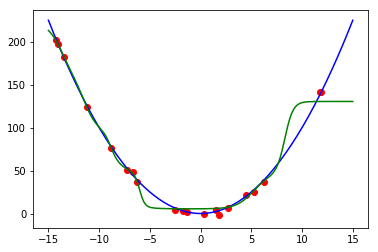

In [10]:
x_ = np.linspace(-15, 15, 160) # define axis

pred_x = np.reshape(x_, [160, 1]) # [160, ] -> [160, 1]
pred_y = clf.predict(pred_x) # predict network output given x_
fig = plt.figure() 
plt.plot(x_, x_**2, color = 'b') # plot original function
plt.scatter(x, y, color = 'r') # plot training data
plt.plot(pred_x, pred_y, 'g') # plot network output

#### In the above code, play on the hyperparameters, number of samples, and increase noise.